# Import Libraries

In [135]:
import pandas as pd
import numpy as np
import string
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from pathlib import Path

from keras import backend as K
K.clear_session()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Project Overview (Ulasan Projek)
***
**Kriteria Wajib** <br>
- Tuliskan latar belakang yang relevan dengan proyek yang Anda kerjakan.

**Kriteria Opsional** <br>
- Menjelaskan mengapa proyek ini penting untuk diselesaikan.
- Menyertakan hasil riset atau referensi yang terkait.

## Kriteria Wajib

### Latar belakang yang relevan
***
Menurut data terbaru, industri anime terus mengalami pertumbuhan, dengan peningkatan signifikan dalam jumlah penggemar global. Berdasarkan laporan dari Association of Japanese Animations (AJA), pasar anime global tumbuh 13,3% dan mencapai nilai sekitar $24 miliar pada 2021 dan diperkirakan terus meningkat. Media **Detik.com** juga menyebut bahwa penggemar anime mencapai 1 miliar di seluruh dunia **[4]**. Ini menunjukkan potensi ekonomi besar dan tingginya minat akan konten anime.
Sistem rekomendasi sangat penting dalam industri ini karena pengguna sering kesulitan menemukan anime yang sesuai di antara ribuan judul yang tersedia **[1]**. Penelitian menunjukkan bahwa sistem rekomendasi berbasis AI, terutama di platform seperti Netflix dan Crunchyroll, meningkatkan engagement pengguna dengan menyediakan rekomendasi yang relevan, mengurangi waktu pencarian, dan meningkatkan pengalaman menonton **[1-3]**.

## [Optional]

### Mengapa projek ini penting diselesaikan
***
Sistem rekomendasi **dapat membantu pengguna menemukan anime yang sesuai dengan preferensi mereka, meningkatkan kepuasan pengguna, dan membantu mengatasi masalah kebingungan akibat terlalu banyak pilihan**. Content-based filtering dan collaborative-based filtering adalah dua teknik utama yang digunakan untuk membuat rekomendasi yang relevan. Kombinasi keduanya dapat menghasilkan sistem rekomendasi yang lebih akurat dengan mempertimbangkan preferensi pengguna dan popularitas di antara pengguna lain.

### Menyertakan hasil riset atau referensi terkait
***
[1] Ota, S., Kawata, H., Muta, M., Masuko, S., & Hoshino, J. I. (2017). Anireco: Japanese anime recommendation system. In Entertainment Computing–ICEC 2017: 16th IFIP TC 14 International Conference, Tsukuba City, Japan, September 18-21, 2017, Proceedings 16 (pp. 400-403). Springer International Publishing.<br>
[2] Wibowo, A. T. (2020, December). Leveraging side information to anime recommender system using deep learning. In 2020 3rd International Seminar on Research of Information Technology and Intelligent Systems (ISRITI) (pp. 62-67). IEEE. <br>
[3] Soni, B., Thakuria, D., Nath, N., Das, N., & Boro, B. (2023). RikoNet: A Novel Anime Recommendation Engine. Multimedia Tools and Applications, 82(21), 32329-32348. <br>
[4] https://www.detik.com/pop/culture/d-7604629/anime-makin-ngetren-lebih-dari-1-miliar-penggemar-di-seluruh-dunia, diakses 29 Oktober 2024 <br>
[5] https://rejogja.republika.co.id/berita/rlflwz399/aja-laporkan-industri-anime-tumbuh-133-persen, diakses 29 Oktober 2024

# Business Understanding
***
**Kriteria Wajib** <br>
- Problem Statements (pernyataan masalah)
- Goals (tujuan)

Semua poin di atas harus diuraikan dengan jelas. <br>

**Kriteria Optional** <br>
- Mengajukan dua solution approach (content based filtering dan collaborative filtering)

## Kriteria Wajib

### Problem Statement
***
Untuk bisa memberikan pengalaman pengguna pada platform streaming film anime, maka diperlukan pengembangan sistem rekomendasi film anime untuk menjawab permasalahan berikut.
1. Berdasarkan data anime yang memuat informasi yang relevan terkait anime, bagaimana membuat sistem rekomendasi yang dipersonalisasi dengan teknik content-based filtering?
2. Berdasarkan data rating pengguna yang telah menilai film anime yang ditontonnya, bagaimana platform dapat merekomendasikan anime lain yang mungkin disukai penonton lainnya yang belum pernah ditonton sebelumnya?

### Goals
***
Tujuan yang ingin dicapai dari masalah tersebut adalah sebagai berikut.
1. Menghasilkan sejumlah rekomendasi film anime berbasis Content-based filtering untuk memberikan rekomendasi film anime sejenis berdasarkan data anime yang telah ada
2. Menghasilkan sejumlah rekomendasi film anime yang sesuai dengan preferensi pengguna sesuai data rating dan belum pernah ditonton sebelumnya dengan memanfaatkan teknik Collaborative filtering

## [Optional] Solution Approach
***
Untuk mencapai dua goals tersebut maka dua teknik dalam pembuatan sistem rekomendasi digunakan pada projek kali ini.
1. Content-based Filtering: memanfaatkan dataset anime yang berisi informasi mengenai judul, genre, average rating, sinopsis yang dapat digunakan untuk memberikan rekomendasi ke pengguna berdasarkan konten (anime) yang serupa
2. Collaborative-based filtering: rating pengguna pada setiap film anime yang telah ditontonnya dimanfaatkan untuk bisa memberikan rekomendasi ke pengguna lain sesuai dengan preferensinya namun belum pernah menonton anime tersebut

# Data Understanding
***
**Kriteria Wajib** <br>
- Memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan.
- Menuliskan tautan sumber data (link download).
- Menguraikan seluruh variabel atau fitur pada data.

**Kriteria Optional** <br>
- Melakukan beberapa tahapan yang diperlukan mengenai data, contohnya teknik visualisasi data beserta insight atau exploratory data analysis.

## Kriteria Wajib

### Tautan Sumber Dataset
***
Dataset yang berisi kumpulan anime diperoleh dari dataset pihak ketiga bernama **Anime Recommendation Database** yang bisa diakses melalui https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database dan **Anime Recommendation Database 2020** dapat diakses melalui tautan berikut: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020 untuk mendapatkan sinopsis dari setiap anime untuk tujuan memberikan rekomendasi anime dengan alur cerita yang mirip

### Sekilas Tentang Dataset
***
- This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.
- In particular, this dataset contain:
    - The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
    - Ratings given by users to the animes that they has watched completely.
    - Information about the anime like genre, stats, studio, etc.
- This dataset was scrapped between February 26th and March 20th

### File-file dalam dataset Anime Recommendation Database
***
- `anime.csv`: contain general information of every anime (17.562 different anime) like genre, stats, studio, etc.
- `rating.csv`: contain rating of each 12.294 animes from +-73.516 users

### File-file dalam dataset **Anime Recommendation Database 2020**
***
- `animelist.csv`: have the list of all animes register by the user with the respective score, watching status and numbers of episodes watched. This dataset contains 109 Million row, 17.562 different animes and 325.772 different users.
- `watching_status.csv`: describe every possible status of the column: "watching_status" in `animelist.csv`.
- `rating_complete.csv`: This file is a subset of `animelist.csv`. This file only considers animes that the user has watched completely (watching_status==2) and gave it a score (score!=0). This dataset contains 57 Million ratings applied to 16.872 animes by 310.059 users.
- `anime.csv`: contain general information of every anime (17.562 different anime) like genre, stats, studio, etc.
- `anime_with_synopsis.csv`: contain synopsis information of every anime related to `anime.csv` file.

***
**DISCLAIMER!** <br>
- File-file dari **Anime Recommendation Database 2020** yang akan digunakan pada projek kali ini hanya `anime_with_synopsis.csv` untuk mengambil sinopsis dari setiap animenya saja. File `rating.csv` dan `anime.csv` diambil dari **Anime Recommendation Database**. Namun, beberapa informasi penting dari file `anime.csv` pada **Anime Recommendation Database 2020** tetap digunakan misalnya, *Producers*, *Licensors*, *Studios* dsb karena mungkin saja user memiliki preferensi yang sama terhadap fitur-fitur tersebut. 
- File-file lain pada database ini tidak digunakan. Hal tersebut dikarenakan pada file **`animelist.csv`** jumlah barisnya terlalu besar dan status film yang ditonton oleh user masih banyak yang belum **completed** sehingga rating yang diberikan belum fair. File **`watching_status.csv`** tidak digunakan karena hanya menjadi tabel deskripsi dari status film pada file **`animelist.csv`** dan tidak mengandung informasi apapun lainnya yang dapat mendukung proses pembuatan sistem rekomendasi

### Deskripsi variabel atau fitur pada setiap file dalam dataset
***
1. Deskripsi variabel pada file **`animelist.csv`**
    - user_id: non identifiable randomly generated user id.
    - anime_id: MyAnimeList ID of the anime. (e.g. 1).
    - score: score between 1 to 10 given by the user. 0 if the user didn't assign a score. (e.g. 10)
    - watching_status: state ID from this anime in the anime list of this user. (e.g. 2)
    - watching_status: state ID from this anime in the anime list of this user. (e.g. 2)
1. Deskripsi variabel pada file **`watching_status.csv`**
    - status: status ID of each anime
    - description: description (Currently watching, Completed, On Hold, Dropped, Plan to Watch)
1. Deskripsi variabel pada file **`rating_complete.csv`**
    - user_id: non identifiable randomly generated user id.
    - anime_id: - MyAnimelist ID of the anime that this user has rated.
    - rating: rating that this user has assigned.
1. Deskripsi variabel pada file **`anime.csv`**
    - MAL_ID: MyAnimelist ID of the anime. (e.g. 1)
    - Name: full name of the anime. (e.g. Cowboy Bebop)
    - Score: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
    - Genres: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
    - English name: full name in english of the anime. (e.g. Cowboy Bebop)
    - Japanese name: full name in japanses of the anime. (e.g. カウボーイビバップ)
    - Type: TV, movie, OVA, etc. (e.g. TV)
    - Episodes': number of chapters. (e.g. 26)
    - Aired: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)
    - Premiered: season premiere. (e.g. Spring 1998)
    - Producers: comma separated list of produducers (e.g. Bandai Visual)
    - Licensors: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)
    - Studios: comma separated list of studios (e.g. Sunrise)
    - Source: Manga, Light novel, Book, etc. (e.g Original)
    - Duration: duration of the anime per episode (e.g 24 min. per ep.)
    - Rating: age rate (e.g. R - 17+ (violence & profanity))
    - Ranked: position based in the score. (e.g 28)
    - Popularity: position based in the the number of users who have added the anime to their list. (e.g 39)
    - Members: number of community members that are in this anime's "group". (e.g. 1251960)
    - Favorites: number of users who have the anime as "favorites". (e.g. 61,971)
    - Watching: number of users who are watching the anime. (e.g. 105808)
    - Completed: number of users who have complete the anime. (e.g. 718161)
    - On-Hold: number of users who have the anime on Hold. (e.g. 71513)
    - Dropped: number of users who have dropped the anime. (e.g. 26678)
    - Plan to Watch': number of users who plan to watch the anime. (e.g. 329800)
    - Score-10': number of users who scored 10. (e.g. 229170)
    - Score-9': number of users who scored 9. (e.g. 182126)
    - Score-8': number of users who scored 8. (e.g. 131625)
    - Score-7': number of users who scored 7. (e.g. 62330)
    - Score-6': number of users who scored 6. (e.g. 20688)
    - Score-5': number of users who scored 5. (e.g. 8904)
    - Score-4': number of users who scored 4. (e.g. 3184)
    - Score-3': number of users who scored 3. (e.g. 1357)
    - Score-2': number of users who scored 2. (e.g. 741)
    - Score-1': number of users who scored 1. (e.g. 1580)
    
1. Deskripsi variabel pada file **`anime_with_synopsis.csv`**
    - MAL_ID: MyAnimelist ID of the anime. (e.g. 1)
    - Name: full name of the anime. (e.g. Cowboy Bebop)
    - Score: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
    - Genres: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
    - synopsis: anime synopsis description

### Informasi Jumlah Data, Kondisi Data, dan Informasi mengenai data yang digunakan

#### Deskripsi File-file pada database `Anime Recommendation Database 2020`

##### File `anime.csv`

In [2]:
anime_df = pd.read_csv('./dataset/anime.csv')

In [3]:
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


Jumlah baris dan kolom pada file **`anime.csv`** masing-masing sebesar 17.562 baris dan 35 kolom

In [4]:
anime_df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

Kolom yang terdapat pada file ini sudah sesuai dengan deskripsi yang ada pada tautan

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Beberapa kolom/atribut sudah memiliki tipe data yang sesuai peruntukkannya, namun beberapa atribut yang seharusnya bernilai numerik tetapi tertulis bertipe object (Score-1 sampai Score-10; Ranked; Duration; Episodes). Selain itu kolom **Aired** seharusnya bertipe *datetime* dan bukan Object

In [6]:
anime_df.describe(include='all')

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,17562.000000,17562,17562,17562,17562,17562,17562,17562,17562,17562,...,17562,17562,17562,17562,17562,17562,17562,17562,17562,17562
unique,NaN,17558,533,5034,6831,16679,7,201,11947,231,...,3379,3645,4515,4933,4236,3288,2235,1506,1110,1084
top,NaN,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Unknown,Hentai,Unknown,Unknown,TV,1,Unknown,Unknown,...,4.0,Unknown,Unknown,2.0,Unknown,Unknown,Unknown,Unknown,Unknown,4.0
freq,NaN,3,5141,969,10565,48,4996,8381,309,12817,...,936,3167,1371,610,511,584,977,1307,1597,955
mean,21477.192347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14900.093170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5953.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,22820.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35624.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hasil statistik awal dari dataset mentah yang digunakan menunjukkan anime berjudul **Maou Gakuin no Futekigousha: Shijou Saikyou no** paling banyak. Genre **Hentai** juga menjadi anime yang paling banyak dari dataset yang tersedia. Beberapa kolom (misalnya Score-1 sampai Score-10; Aired; Premiered; English name; dll) menunjukkan nilai **Unknown** yang paling sering muncul. Hal tersebut menunjukkan anomali dan akan ditangani pada tahapan berikutnya

In [7]:
sorted(anime_df['MAL_ID'].unique())

[1,
 5,
 6,
 7,
 8,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203

*MAL_ID* yang merupakan anime_ID dimulai dari angka 1

##### File `rating_complete.csv`

In [8]:
rating_complete_df = pd.read_csv('./dataset/rating_complete.csv')

In [9]:
rating_complete_df

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


Jumlah baris dan kolom pada file **`rating_complete.csv`** masing-masing sebesar 57.633.278 baris (57 juta baris) dan 3 kolom. Untuk mempercepat proses pemodelan, maka dari itu data **rating** yang digunakan diambil dari database **Anime Recommendation Database** yang berisi jumlah rating yang relatif lebih sedikit dibanding data ini, yaitu berisi +-7,8 juta baris

In [10]:
rating_complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


Semua atribut pada file ini sudah memiliki tipe data yang sesuai peruntukkannya

In [11]:
sorted(rating_complete_df['anime_id'].unique())

[1,
 5,
 6,
 7,
 8,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203

Konsisten dengan *MAL_ID* pada file `anime.csv` yang dimulai dengan indeks 1, indeks *anime_id* pada file `rating_complete_df.csv` juga dimulai dari 1

##### File `anime_with_synopsis.csv`

In [12]:
anime_with_synopsis_df = pd.read_csv('./dataset/anime_with_synopsis.csv')

In [13]:
anime_with_synopsis_df

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


Jumlah baris dan kolom pada file **`anime_with_synopsis.csv`** masing-masing sebesar 16.214 baris dan 5 kolom

In [14]:
anime_with_synopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


Semua kolom/atribut pada file ini sudah memiliki tipe data yang sesuai peruntukkannya, kecuali atribut **Score** yang seharusnya memiliki tipe data numerik (int64) dan bukan Object.

#### Deskripsi File-file pada database `Anime Recommendation Database`

##### File `anime.csv`

In [15]:
anime_df_lite_version = pd.read_csv('./dataset/animeliteversion/anime.csv')

In [16]:
anime_df_lite_version

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Sekilas kolom-kolom pada file ini serupa dengan file `anime.csv` pada **Anime Recommendation Database 2020** dengan deskripsi yang sama, namun jumlah baris datanya relatif lebih sedikit pada file yang ini yaitu 12.294 baris dengan 7 kolom

In [17]:
anime_df_lite_version.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Tipe datanya juga sesuai dengan peruntukkannya

##### File `rating.csv` versi ukuran yang lebih kecil dengan jumlah baris data lebih sedikit

In [18]:
rating_df_lite_version = pd.read_csv('./dataset/animeliteversion/rating.csv')

In [19]:
rating_df_lite_version

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Jumlah data rating pada file ini relatif lebih sedikit dibandingkan file `rating.csv` pada database **Anime Recommendation Database 2020** yang memiliki >57 juta baris data, sedangkan jumlah baris pada data rating ini memiliki +-7,8 juta baris data.
Deskripsi kolom yang dimilikinya juga serupa dengan yang ada pada database **Anime Recommendation Database 2020**

## [Optional] Data Visualization and Exploratory Data Analysis
***
Data visualization dan EDA yang dilakukan akan berfokus pada file `anime.csv` dan `rating.csv` yang diperoleh dari kedua database yaitu **Anime Recommendation Database** dan **Anime Recommendation Database 2020** yang sudah digabung, sedangkan sinopsis dari setiap anime diperoleh dari file `anime_with_synopsis.csv` dari database **Anime Recommendation Database 2020**

### EDA File **`anime.csv`**
***
Merged terlebih dahulu file `anime.csv` dari kedua database

In [20]:
anime_df_merged = pd.merge(anime_df, anime_df_lite_version, left_on='MAL_ID', right_on='anime_id', how='inner')
anime_df_merged.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-3,Score-2,Score-1,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,1357.0,741.0,1580.0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,221.0,109.0,379.0,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,664.0,316.0,533.0,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,353.0,164.0,131.0,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,83.0,50.0,27.0,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


#### MAL_ID Unique dan Judul Anime Unique

In [21]:
print(f"Jumlah MAL_ID Unik: {len(anime_df_merged['anime_id'].unique())}")
print(f"Jumlah Judul Anime Unik: {len(anime_df_merged['name'].unique())}")

Jumlah MAL_ID Unik: 12254
Jumlah Judul Anime Unik: 12253


#### Check apakah ada nan/missing values

In [22]:
# function untuk cek jumlah nan values pada setiap kolom yang diinputkan
def is_nan(anime_df_merged, column):
    df = anime_df_merged[
        (anime_df_merged[column]=='Unknown') |
        (anime_df_merged[column]=='') |
        (anime_df_merged[column].isna())
    ].shape
    return df[0]

In [23]:
for col in anime_df_merged.columns:
    print(f"Jumlah baris kosong pada kolom {col} = {is_nan(anime_df_merged, col)} baris")

Jumlah baris kosong pada kolom MAL_ID = 0 baris
Jumlah baris kosong pada kolom Name = 0 baris
Jumlah baris kosong pada kolom Score = 2380 baris
Jumlah baris kosong pada kolom Genres = 32 baris
Jumlah baris kosong pada kolom English name = 7094 baris
Jumlah baris kosong pada kolom Japanese name = 20 baris
Jumlah baris kosong pada kolom Type = 4 baris
Jumlah baris kosong pada kolom Episodes = 55 baris
Jumlah baris kosong pada kolom Aired = 44 baris
Jumlah baris kosong pada kolom Premiered = 8550 baris
Jumlah baris kosong pada kolom Producers = 4722 baris
Jumlah baris kosong pada kolom Licensors = 8794 baris
Jumlah baris kosong pada kolom Studios = 4309 baris
Jumlah baris kosong pada kolom Source = 3427 baris
Jumlah baris kosong pada kolom Duration = 70 baris
Jumlah baris kosong pada kolom Rating = 258 baris
Jumlah baris kosong pada kolom Ranked = 1182 baris
Jumlah baris kosong pada kolom Popularity = 0 baris
Jumlah baris kosong pada kolom Members = 0 baris
Jumlah baris kosong pada kolom 

Dari hasil pengecekan pada beberapa kolom terdapat missing value. Missing values ini akan ditangani pada **Data Preprocessing**

#### Check apakah ada data redundan

In [24]:
anime_df_merged[
    anime_df_merged.duplicated()
]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-3,Score-2,Score-1,anime_id,name,genre,type,episodes,rating,members


Tidak ada data duplikat pada file hasil merged

#### Ada genre apa saja dari data anime yang terkumpul?

In [25]:
# mencari tahu ada genre unik apa saja dan berapa jumlah anime dengan genre tersebut
unique_genres = dict()
for combined_genre in anime_df_merged['genre'].values:
    if combined_genre is np.nan:
        continue
    splitted_genre = combined_genre.split(',')
    for genre in splitted_genre:
        genre = genre.strip()
        if genre not in unique_genres:
            unique_genres[genre] = [0]
        else:
            unique_genres[genre][0]+=1

for k,v in unique_genres.items():
    print(f"Genre {k} berjumlah = {v} film")

Genre Action berjumlah = [2829] film
Genre Adventure berjumlah = [2337] film
Genre Comedy berjumlah = [4632] film
Genre Drama berjumlah = [2010] film
Genre Sci-Fi berjumlah = [2057] film
Genre Space berjumlah = [377] film
Genre Mystery berjumlah = [493] film
Genre Magic berjumlah = [775] film
Genre Police berjumlah = [196] film
Genre Supernatural berjumlah = [1036] film
Genre Fantasy berjumlah = [2303] film
Genre Shounen berjumlah = [1707] film
Genre Sports berjumlah = [541] film
Genre Josei berjumlah = [53] film
Genre Romance berjumlah = [1460] film
Genre Slice of Life berjumlah = [1218] film
Genre Cars berjumlah = [71] film
Genre Seinen berjumlah = [545] film
Genre Horror berjumlah = [368] film
Genre Psychological berjumlah = [228] film
Genre Thriller berjumlah = [85] film
Genre Martial Arts berjumlah = [264] film
Genre Super Power berjumlah = [462] film
Genre School berjumlah = [1217] film
Genre Ecchi berjumlah = [634] film
Genre Vampire berjumlah = [101] film
Genre Historical berju

Ada genre yang missing (ditandai dengan nan) pada dataset, ini termasuk missing values yang akan ditangani

#### Persebaran data pada atribut kategorikal
***
Karena nilai unik dari masing-masing atribut kategorikal sangat banyak dan sulit untuk divisualisasikan semuanya karena tidak tampak semuanya, maka hanya nilai yang memenuhi threshold (yaitu 25 nilai unik) dari setiap atribut yang akan divisualisasikan

In [26]:
def categorical_bar_plot(df, col, xlabel, ylabel, title, figsize=(8,6), color='red', cutoff=25):
    # Get the frequency of each category
    category_counts = df[col].value_counts().head(cutoff).reset_index()
    category_counts.columns = [col, 'Frequency']

    # Create a horizontal bar plot
    plt.figure(figsize=figsize)
    plt.barh(
        category_counts[col], 
        category_counts['Frequency'], 
        color=color,
        edgecolor='black',
        linewidth=1.5
    )

    # Add text labels on top of each bar
    for index, value in enumerate(category_counts['Frequency']):
        plt.text(value, index, str(value), va='center')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the plot
    plt.show()

##### unique Genre

In [27]:
genre_df = pd.DataFrame(data=unique_genres).T.reset_index()
genre_df.columns = ['genre', 'Frequency']
genre_df.sort_values(by='Frequency', inplace=True, ascending=False)
genre_df.head()

,genre,Frequency
2,Comedy,4632
0,Action,2829
1,Adventure,2337
10,Fantasy,2303
4,Sci-Fi,2057


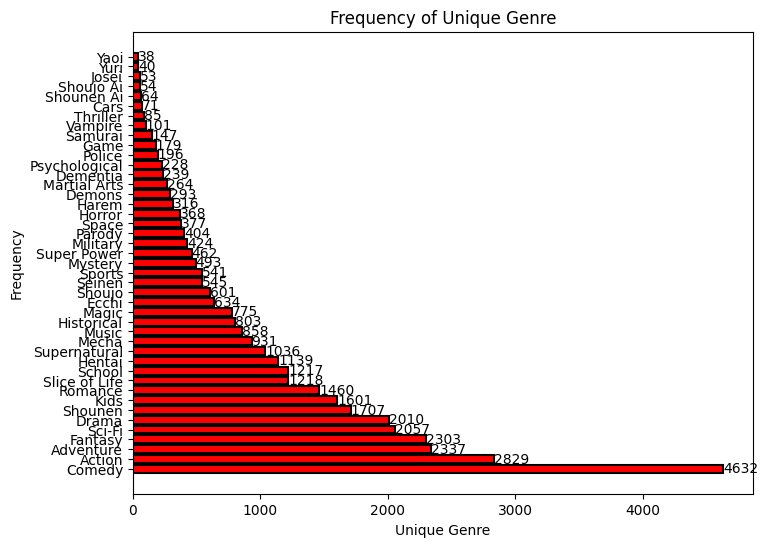

In [28]:
# Create a horizontal bar plot
plt.figure(figsize=(8,6))
plt.barh(
    genre_df['genre'], 
    genre_df['Frequency'], 
    color='red',
    edgecolor='black',
    linewidth=1.5
)

# Add text labels on top of each bar
for index, value in enumerate(genre_df['Frequency']):
    plt.text(value, index, str(value), va='center')

# Add labels and title
plt.xlabel('Unique Genre')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Genre')

# Show the plot
plt.show()

Genre anime didominasi oleh *Comedy*, *Action*, dan *Adventure*

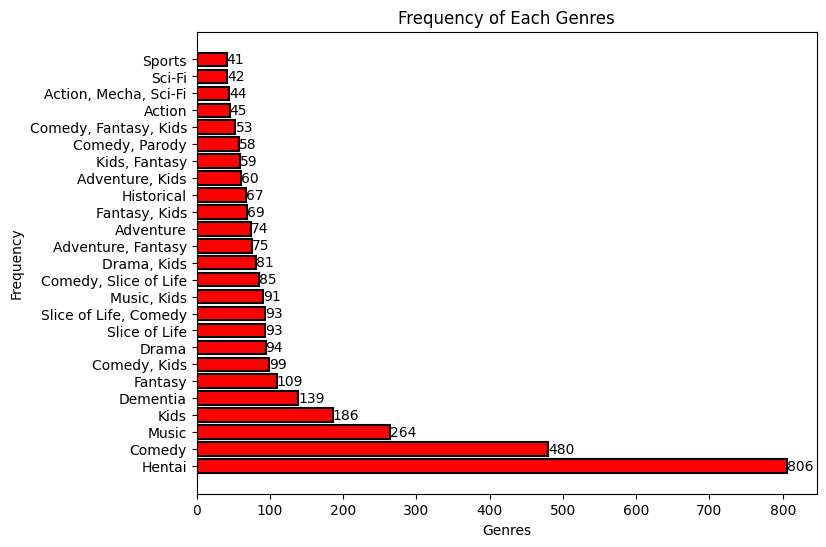

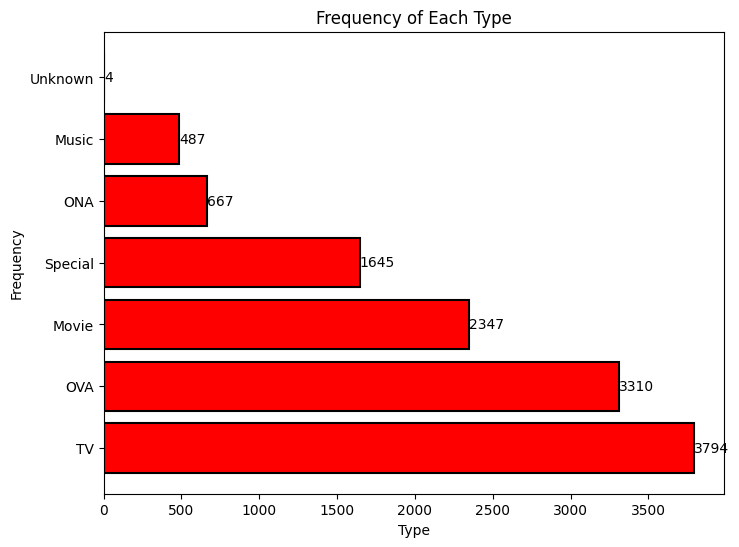

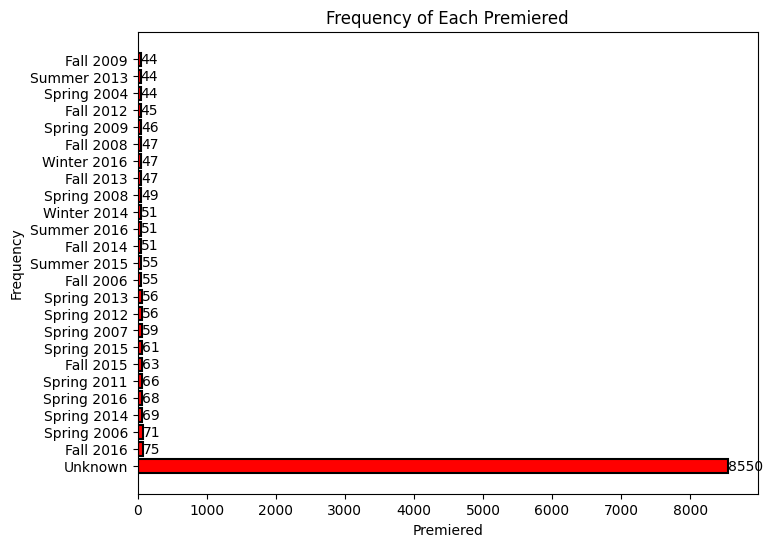

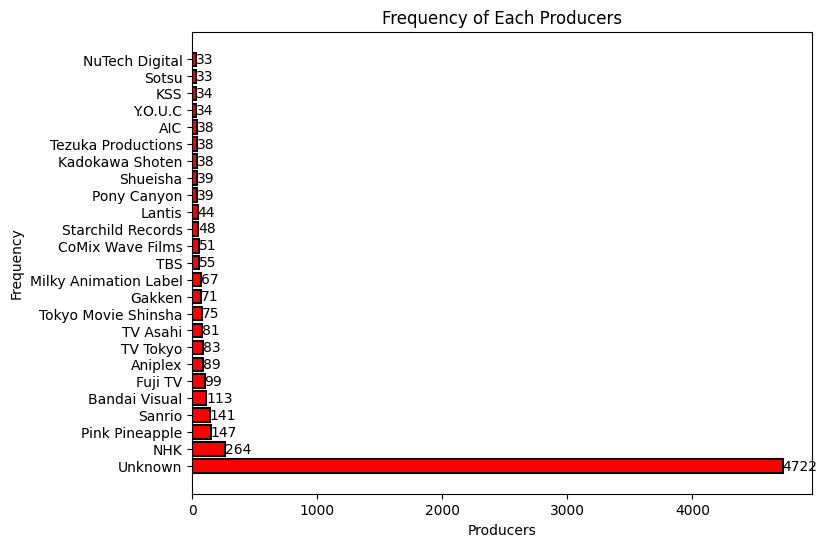

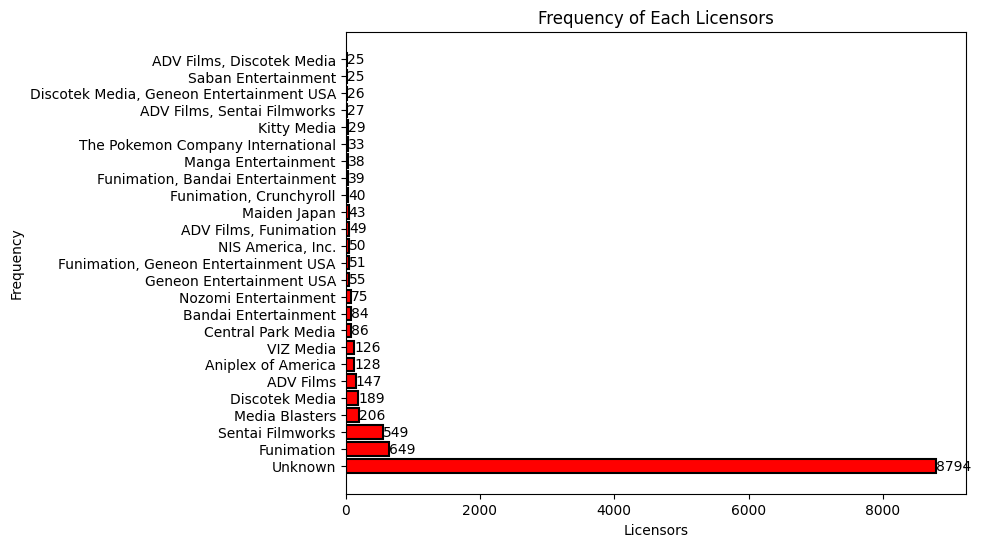

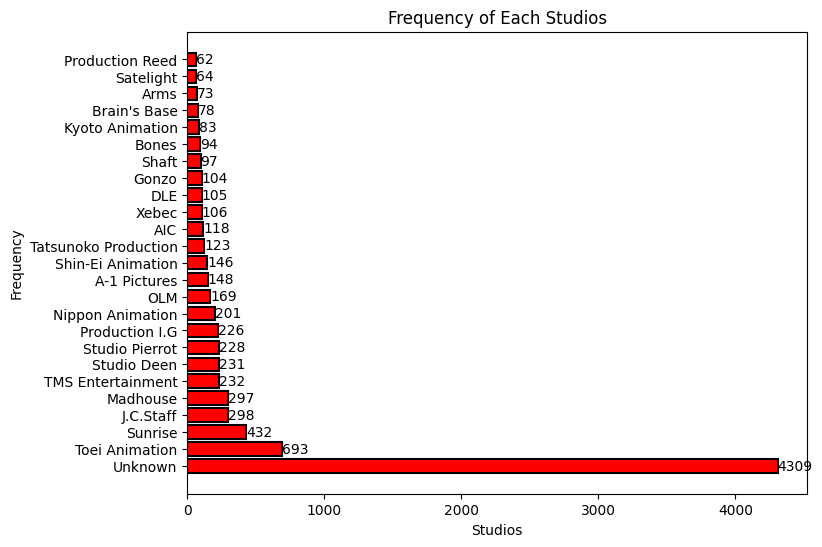

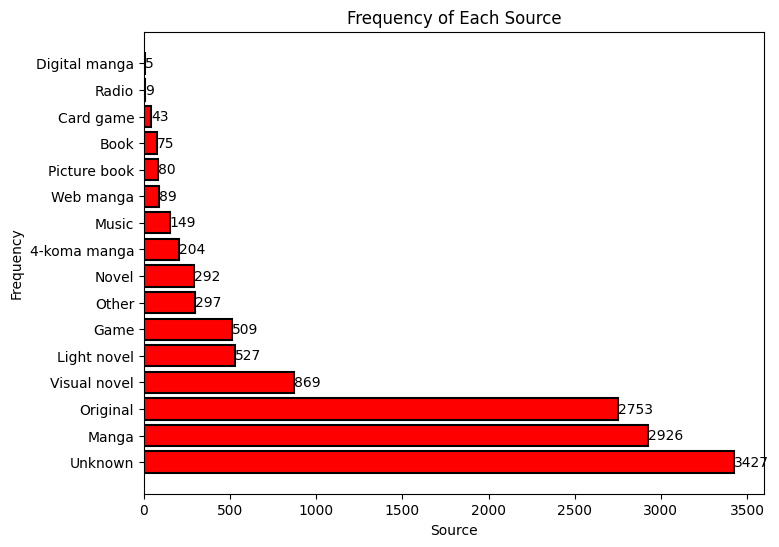

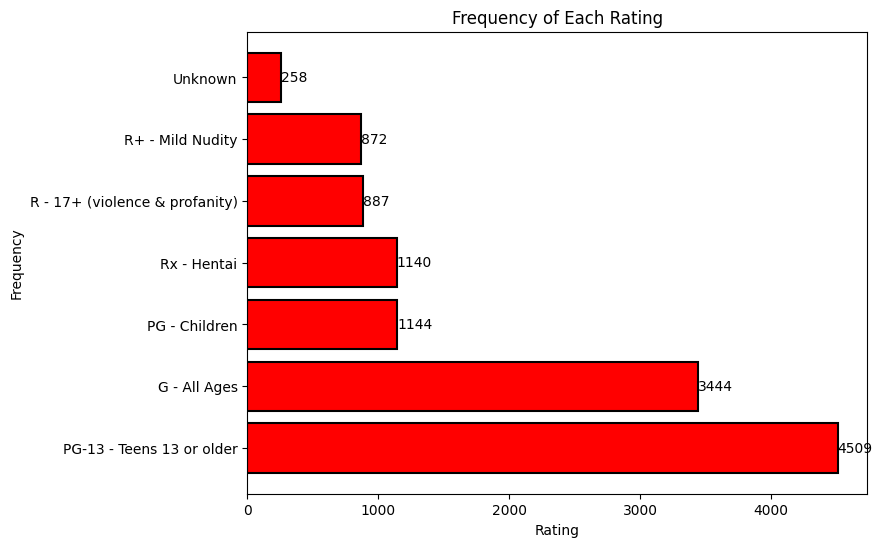

In [29]:
categorical_cols = list(anime_df_merged.columns.drop([
    'MAL_ID', 'Name', 'Score',
    'English name', 'Japanese name',
    'Episodes', 'Aired',
    'Duration', 'Ranked', 'Popularity',
    'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
    'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
    'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'anime_id', 'name', 'genre', 'episodes', 'type', 'rating', 'members'
])) 
for col in categorical_cols:
    categorical_bar_plot(anime_df_merged, col, xlabel=col, ylabel='Frequency', title=f'Frequency of Each {col}')

**Insights** <br>
- Genre *Hentai*, *Music*, dan *Comedy* menjadi top 3 genres yang paling banyak ditonton
- Masih terdapat missing values sejumlah 63 baris data

- Type *TV* dan *OVA* menjadi top 2 tipe yang paling digemari
- Masih terdapat missing values sejumlah 37 baris data


- Producer *NHK* dan *Pink Pineapple* menjadi dua produser yang paling banyak menghasilkan anime
- Pada atribut ini Jumlah producer yang tidak diketahui sangat banyak mencapai 7794

- Sama halnya seperti Producer, Jumlah missing values (Unknown) pada atribut Licensors sangat mendominasi dengan Jumlah 13.616
- Licensors *Funimation* dan *Sentai Filmworks* menjadi Top 2 lisensi teratas

- Anime didominasi rating *PG-13* dan *G-All Ages*. Daftar anime yang ada pada dataset juga terdapat rating untuk film dewasa yang cukup banyak (*Rx-Hentai*, *R-17+* dan *R+-Mild Nudity*)


### EDA File **`rating.csv`**
***
File rating yang digunakan pada projek kali ini berasal dari file `rating.csv` pada database **Anime Recommendation Database** saja (file yang berisi +-7,8 juta rating)

In [30]:
rating_df_lite_version.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Rating bernilai -1 menunjukkan user/pengguna belum memberikan rating terhadap anime yang ditontonnya. Oleh karena itu, nilai ini dianggap missing value

#### Check apakah ada missing values pada kolom anime_id

In [31]:
rating_df_lite_version[
    (rating_df_lite_version['anime_id']==0)|
    (rating_df_lite_version['anime_id'].isna()) |
    (rating_df_lite_version['anime_id'].isnull()) 
]

,user_id,anime_id,rating


Tidak ada missing values pada kolom *anime_id* 

#### Persebaran data pada kolom *Rating*

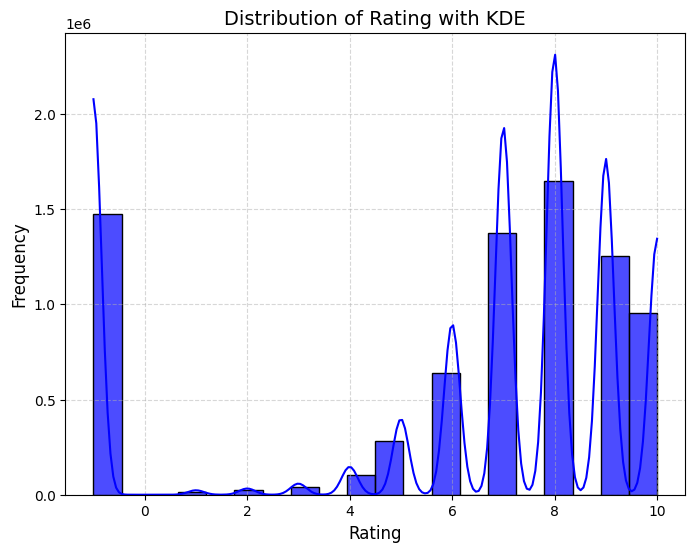

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(rating_df_lite_version['rating'], bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Rating with KDE', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

**Analisis**
- Ada nilai **-1** pada kolom rating. Berdasarkan deskripsi dari sumber dataset, nilai -1 pada kolom ini menandakan user/pengguna belum memberikan rating dari anime yang sedang/sudah ditontonnya. Oleh karena itu, nilai semacam ini selanjutnya dikategorikan sebagai missing values.
- Distribusi nilai selain -1 cenderung left skewed

#### Check apakah ada data redundan

In [33]:
rating_df_lite_version[
    rating_df_lite_version.duplicated()
]

,user_id,anime_id,rating
4499316,42653,16498,8


Ada 1 data redundan pada file `rating.csv`

#### Hitung score rating rata-rata dari setiap judul anime

In [34]:
# hitung rata-rata rating dari setiap anime beserta jumlah user yang memberikan rating tersebut
mean_rating_per_anime = rating_df_lite_version.groupby('anime_id')[['user_id','rating']].agg({
    'user_id':'count',
    'rating':'mean'
}).reset_index()
mean_rating_per_anime.columns = ['anime_id', 'count_user_id', 'mean_rating']
mean_rating_per_anime.sort_values(by=['count_user_id', 'mean_rating'], inplace=True)

In [35]:
# merge informasi judul anime
mean_rating_per_anime = pd.merge(
    mean_rating_per_anime, 
    anime_df_merged[['MAL_ID', 'Name']].rename(columns={
        'MAL_ID':'anime_id',
        'Name':'Anime Title'
    }), 
    on='anime_id',
    how='left'
)
mean_rating_per_anime.head(15)

,anime_id,count_user_id,mean_rating,Anime Title
0,2708,1,-1.0,Wankorobee
1,2710,1,-1.0,Nintama Rantarou Movie
2,2930,1,-1.0,Tensai? Dr. Hamax
3,3073,1,-1.0,Robby to Kerobby
4,3372,1,-1.0,RGB Adventure
5,3414,1,-1.0,Hula Kappa
6,3500,1,-1.0,"Yume Miru, Anime: on-chan"
7,3514,1,-1.0,Noramimi
8,3575,1,-1.0,Sugai-kun to Kazoku Ishi The Movie
9,4131,1,-1.0,Twin Bee Paradise


Dari hasil perhitungan di atas, masih terdapat rating anime yang diberikan oleh 1 orang saja dan ini tidak fair. Untuk dapat melihat insight rata-rata rating yang diberikan suatu komunitas pengguna terhadap anime tertentu maka kita bisa gunakan nilai threshold jumlah pengguna yang telah memberikan voting, sebagai contoh di atas 100 pengguna.

In [36]:
mean_rating_per_anime = mean_rating_per_anime[
    mean_rating_per_anime['count_user_id']>100
].copy()

##### Top 20 Anime dengan top rating (>8.5)

In [37]:
mean_rating_per_anime[
    mean_rating_per_anime['mean_rating'] > 8.5
].sort_values(by='mean_rating', ascending=False).head(20)

,anime_id,count_user_id,mean_rating,Anime Title


##### Top 20 anime dengan rating rendah (<5)

In [38]:
mean_rating_per_anime[
    mean_rating_per_anime['mean_rating'] <5
].sort_values(by='mean_rating', ascending=True)

,anime_id,count_user_id,mean_rating,Anime Title
7812,3287,237,1.725738,Tenkuu Danzai Skelter+Heaven
9618,413,1131,2.142352,Hametsu no Mars
7772,16608,231,2.502165,Shitcom
6724,2862,109,3.000000,Tokineiro
7149,2946,145,3.034483,Angel Core: Tenshi-tachi no Sumika
...,...,...,...,...
9630,17259,1142,4.998249,Kuroko no Basket: Oshaberi Shiyokka
8865,6425,582,4.998282,Weiß Survive
9028,10933,679,4.998527,R-15: R15 Shounen Hyouryuuki
9297,221,853,4.998828,Mezzo Forte


### EDA File **`anime_with_synopsis.csv`**
***
File **anime_with_synopsis.csv** diperoleh dari datababase **Anime Recommendation Database 2020**

In [39]:
anime_with_synopsis_df.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


#### Ada berapa banyak missing values/nan values?

In [40]:
columns = ['Genres', 'sypnopsis']
for col in columns:
    print(f"Jumlah baris kosong pada kolom {col} = {is_nan(anime_with_synopsis_df, col)} baris")

Jumlah baris kosong pada kolom Genres = 63 baris
Jumlah baris kosong pada kolom sypnopsis = 8 baris


Masih terdapat 63 judul anime yang belum terdapat genre dan 8 baris data anime yang belum terdapat sinopsis

#### Apakah ada data redundan?

In [41]:
anime_with_synopsis_df[
    anime_with_synopsis_df.duplicated()
]

,MAL_ID,Name,Score,Genres,sypnopsis


Tidak ada data redundan pada file `anime_with_synopsis.csv`

# Data Preprocessing and Data Preparation
***
Saya memilih menyatukan tahapan data preprocessing dan data preparation karena kedua tahapan ini memiliki irisan langkah yang mirip dan menjadi satu kesatuan. Selain itu, penyatuan kedua tahapan ini untuk mengurangi redundasi tahapan yang dikerjakan

**Kriteria Wajib** <br>
- Menerapkan dan menyebutkan teknik data preparation yang dilakukan.
- Teknik yang digunakan pada notebook dan laporan harus berurutan.

**Kriteria Optional** <br>
- Menjelaskan proses data preparation yang dilakukan.
- Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.

## Kriteria Wajib
***
Berdasarkan hasil pada tahapan **Data Undestanding**, maka tahapan preprocessing dan persiapan data yang dilakukan yaitu: <br>
1. Menghapus kolom-kolom pada file-file yang tidak relevan untuk kebutuhan sistem rekomendasi yang akan dibangun
1. Seragamkan missing values menjadi np.nan
1. Missing values handling
    - Remove missing values pada file `rating.csv`
        - Remove missing values (-1) pada kolom *rating* untuk mempercepat pemrosesan file nantinya karena file ini berisi >7,8 juta baris data
    - Remove missing values pada file `anime.csv`
        - Genres
        - Type
        - Episodes
        - Aired
        - Premiered
        - Producers
        - Licensors
        - Studios
        - Source
        - Duration
    - Remove missing value pada file `anime_with_synopsis.csv`
        - Synopsis
1. Melakukan feature engineering yaitu ekstraksi informasi yang berguna dari beberapa atribut/fitur
1. Menggabungkan file `anime.csv` dan `anime_with_synopsis.csv` menjadi 1 file untuk tujuan **Content-based filtering** dan `rating.csv` (lite version) sendiri untuk tujuan **Collaborative-based filtering**
1. Data duplicate handling and handling missing values if any

### Menghapus kolom-kolom yang tidak relevan dengan kebutuhan

#### Hapus kolom pada  anime_merged
***
Berdasarkan deskripsi kolom pada file ini, sejumlah kolom dirasa tidak relevan sehingga tidak digunakan dalam proses berikutnya. Kolom atau atribut yang dihapus pada dataframe ini yaitu: <br>
- 'Score': fitur score ini akan dihapus namun nantinya akan dihitung berdasarkan data rating terbaru setelah penggabungan data
- 'English name', 
- 'Japanese name',
- 'Ranked', 
- 'Popularity', 
- 'Watching', 
- 'Completed', 
- 'On-Hold', 
- 'Dropped', 
- 'Plan to Watch', 
- 'Score-10' to 'Score-1', 

In [42]:
irrelevant_anime_df_columns = ['Score','English name', 'Japanese name',
       'Ranked', 'Popularity', 'Favorites',
       'Members', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'anime_id', 'name', 'genre','type','episodes','rating','members']
anime_df_merged.drop(columns=irrelevant_anime_df_columns, axis=1, inplace=True)

In [43]:
anime_df_merged.head()

,MAL_ID,Name,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity)
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity)
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children


#### Hapus kolom pada `anime_with_synopsis.csv`
***
Beberapa kolom pada file ini redundan dengan kolom yang ada pada file `anime.csv`, sehingga dapat dihapus. <br>
1. Genres
2. Scores
3. Name

In [44]:
irrelevant_anime_synopsis_columns = [
    'Name', 'Score', 'Genres'
]
anime_with_synopsis_df.drop(columns=irrelevant_anime_synopsis_columns, axis=1, inplace=True)

In [45]:
anime_with_synopsis_df.head()

,MAL_ID,sypnopsis
0,1,"In the year 2071, humanity has colonized sever..."
1,5,"other day, another bounty—such is the life of ..."
2,6,"Vash the Stampede is the man with a $$60,000,0..."
3,7,ches are individuals with special powers like ...
4,8,It is the dark century and the people are suff...


### Seragamkan missing values menjadi np.nan
***
Missing values seperti '', 'Unknown', '-1', dan sebagainya pada setiap atribut akan diseragamkan menjadi np.nan

In [46]:
# seragamkan missing values pada anime_merged
columns = anime_df_merged.columns.drop('MAL_ID')
anime_df_merged[columns] = anime_df_merged[columns].replace('unknown', np.nan)
anime_df_merged[columns] = anime_df_merged[columns].replace('Unknown', np.nan)
anime_df_merged[columns] = anime_df_merged[columns].replace('', np.nan)

# seragamkan missing values pada anime_with_synopsis
anime_with_synopsis_df['sypnopsis'] = anime_with_synopsis_df['sypnopsis'].replace('unknown', np.nan)
anime_with_synopsis_df['sypnopsis'] = anime_with_synopsis_df['sypnopsis'].replace('Unknown', np.nan)
anime_with_synopsis_df['sypnopsis'] = anime_with_synopsis_df['sypnopsis'].replace('', np.nan)

### Penanganan Missing values

#### Remove missing values on `rating.csv`

In [47]:
rating_df_lite_version = rating_df_lite_version[
    ~(rating_df_lite_version['rating']==-1)
]
rating_df_lite_version.reset_index(drop=True, inplace=True)

In [48]:
rating_df_lite_version

,user_id,anime_id,rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10
...,...,...,...
6337236,73515,16512,7
6337237,73515,17187,9
6337238,73515,22145,10
6337239,73516,790,9


Setelah missing values dihapus dari file `rating.csv` jumlah baris dari yang awalnya >7,8 juta kini menjadi 6,3 juta baris

#### Handling missing values pada file `anime.csv` dan `anime_with_synopsis`

In [49]:
anime_df_merged.isna().sum().sort_values()

MAL_ID          0
Name            0
Type            4
Genres         32
Aired          44
Episodes       55
Duration       70
Rating        258
Source       3427
Studios      4309
Producers    4722
Premiered    8550
Licensors    8794
dtype: int64

- Kolom **Type, Genres, Episodes, Aired, Duration** memiliki missing values yang relatif sedikit dibandingkan jumlah keseluruhan data. Apabila dihapus relatif tidak mempengaruhi besar hasilnya. Oleh karena itu, missing values pada kolom ini ditangani dengan cara dihapus. 

##### Remove missing values pada kolom Type, Genres, Episodes, Aired, Duration

In [50]:
anime_df_merged.dropna(subset=['Type','Genres', 'Episodes', 'Aired', 'Duration'], axis=0, inplace=True)

In [51]:
anime_df_merged.isna().sum()

MAL_ID          0
Name            0
Genres          0
Type            0
Episodes        0
Aired           0
Premiered    8408
Producers    4606
Licensors    8623
Studios      4192
Source       3363
Duration        0
Rating        236
dtype: int64

Missing values pada kolom-kolom tersebut sudah tidak ada

##### Handling missing values on Rating, Premiered, Producers, Licensors, Studios, Source
***
- Oleh karena keenam fitur tersebut bertipe kategorikal, untuk alasan kesederhanaan dan efisiensi waktu pengerjaan final projek, maka missing values pada atribut tersebut ditangani dengan metode **fillna** pada pandas dengan menggunakan nilai modus. Metode **fillna** mengisi setiap missing values menggunakan suatu nilai tertentu, bisa berupa rata-rata, minimum, maksimum, ataupun modus dari 
- Teknik lainnya bisa menggunakan cluster analysis lalu menghitung k- tetangga terdekat untuk mengisi nilai yang kosong tersebut. Metode ini cukup kompleks dan tidak dikerjakan lebih lanjut dan menjadi state-of-the-art bagi penelitian berikutnya

In [52]:
# hitung modus dari atribut-atribut tersebut
mode_attributes = ['Rating', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source']
mode_values = anime_df_merged[mode_attributes].mode().iloc[0]

# Fill missing values in specific columns with their mode using fillna
anime_df_merged[mode_attributes] = anime_df_merged[mode_attributes].fillna(mode_values)

In [53]:
anime_df_merged.isna().sum()

MAL_ID       0
Name         0
Genres       0
Type         0
Episodes     0
Aired        0
Premiered    0
Producers    0
Licensors    0
Studios      0
Source       0
Duration     0
Rating       0
dtype: int64

Dari handling missing values di atas sudah tidak terdapat missing values lagi

In [54]:
# reset index anime_df_merged setelah delete missing values agar index dataframe teratur
anime_df_merged.reset_index(drop=True, inplace=True)

#### Removing missing values pada `anime_with_synopsis`

In [55]:
anime_with_synopsis_df.isna().sum()

MAL_ID       0
sypnopsis    8
dtype: int64

- Terdapat 8 anime yang belum memiliki sinopsis. Jumlah missing values tersebut relatif sedikit dibandingkan jumlah baris data keseluruhan yaitu >16 ribu baris, sehingga apabila dihapus tidak menghilangkan banyak informasi. 
- Cara lain yang dapat digunakan adalah mengisi missing values dengan LLM (Large Language Model) ataupun cluster analysis. Namun kedua cara tersebut tidak dijelaskan pada bagian ini

In [56]:
anime_with_synopsis_df.dropna(subset=['sypnopsis'], axis=0, inplace=True)

In [57]:
anime_with_synopsis_df.isna().sum()

MAL_ID       0
sypnopsis    0
dtype: int64

Sudah tidak terdapat missing values pada file `anime_with_synopsis`

In [58]:
anime_with_synopsis_df.reset_index(drop=True, inplace=True)

In [59]:
# ## save data hasil preprocessing untuk dilakukan feature engineering
# anime_df_merged.to_csv('./preprocessed_dataset/anime_df_merged.csv',index=False)
# anime_with_synopsis_df.to_csv('./preprocessed_dataset/anime_with_synopsis.csv',index=False)
# rating_df_lite_version.to_csv('./preprocessed_dataset/rating_df_lite_version.csv',index=False)

### Feature engineering

#### Dataframe `anime_merged`
***
Feature engineering yang dilakukan pada dataframe **anime_merged** adalah: <br>
1. Encoding MAL_ID agar index integer lebih teratur
1. Ekstrak kolom **Premiered** menjadi dua informasi: **season_premiered** dan **year_premiered**
2. Ekstrak kolom **Aired** untuk mendapatkan informasi kapan anime tersebut mulai ditayangkan pertama kali (menjadi **start_aired**). Secara intuisi penonton mungkin menggemari anime pada tahun-tahun tertentu. Informasi mengenai kapan anime tersebut berakhir tidak dicatat karena asumsinya tidak terlalu diperhatikan penonton dalam pertimbangannya untuk menonton
2. Ekstrak kolom **Duration** untuk mendapatkan informasi durasi dalam jam-menit-detik
2. Ubah nilai pada kolom-kolom dengan tipe kategorikal menjadi bentuk one-hot-vector dengan TF-IDF ataupun OneHotEncoding. Pada project kali ini teknik One-hot Encoding dipilih dan digunakan dibandingkan TF-IDF karena lebih masuk akal secara logika dengan memperlihatkan suatu Genre masuk ke anime apa saja, daripada menghitung bobot kemunculan Genre tersebut yang lebih masuk akal untuk studi kasus Sentimen Analisis. Kolom-kolom yang akan dilakukan one-hot encoding yaitu tersebut yaitu:
    - **Genres**
    - **Type**
    - **Producers**
    - **Licensors**
    - **Studios**
    - **Source**
    - **Rating**
2. Normalisasi fitur bertipe numerikal dengan min-max normalization dari hasil fitur engineering sebelumnya

##### 1. Encoding MAL_ID

In [60]:
anime_ids = anime_df_merged['MAL_ID'].unique().tolist()
encoding_anime_ids = {x: i for i, x in enumerate(anime_ids)}

# encoding MAL_ID dengan data encoding
anime_df_merged['encoded_MAL_ID'] = anime_df_merged['MAL_ID'].map(encoding_anime_ids)

In [61]:
encoding_anime_ids

{1: 0,
 5: 1,
 6: 2,
 7: 3,
 8: 4,
 15: 5,
 16: 6,
 17: 7,
 18: 8,
 19: 9,
 20: 10,
 22: 11,
 23: 12,
 24: 13,
 25: 14,
 26: 15,
 27: 16,
 28: 17,
 29: 18,
 30: 19,
 31: 20,
 32: 21,
 33: 22,
 43: 23,
 44: 24,
 45: 25,
 46: 26,
 47: 27,
 48: 28,
 49: 29,
 50: 30,
 51: 31,
 52: 32,
 53: 33,
 54: 34,
 55: 35,
 56: 36,
 57: 37,
 58: 38,
 59: 39,
 60: 40,
 61: 41,
 62: 42,
 63: 43,
 64: 44,
 65: 45,
 66: 46,
 67: 47,
 68: 48,
 69: 49,
 71: 50,
 72: 51,
 73: 52,
 74: 53,
 75: 54,
 76: 55,
 77: 56,
 79: 57,
 80: 58,
 81: 59,
 82: 60,
 83: 61,
 84: 62,
 85: 63,
 86: 64,
 87: 65,
 88: 66,
 89: 67,
 90: 68,
 91: 69,
 92: 70,
 93: 71,
 94: 72,
 95: 73,
 96: 74,
 97: 75,
 98: 76,
 99: 77,
 100: 78,
 101: 79,
 102: 80,
 103: 81,
 104: 82,
 105: 83,
 106: 84,
 107: 85,
 108: 86,
 109: 87,
 110: 88,
 111: 89,
 112: 90,
 113: 91,
 114: 92,
 115: 93,
 116: 94,
 117: 95,
 118: 96,
 119: 97,
 120: 98,
 121: 99,
 122: 100,
 123: 101,
 124: 102,
 125: 103,
 126: 104,
 127: 105,
 128: 106,
 129: 107,
 130:

##### 2. Ekstrak informasi kolom `Premiered`

In [62]:
anime_df_merged[['season_premiered', 'year_premiered']] = anime_df_merged['Premiered'].str.split(' ', expand=True)

# drop column Premiered karena sudah dibutuhkan lagi
anime_df_merged.drop('Premiered', axis=1, inplace=True)

In [63]:
anime_df_merged.head()

,MAL_ID,Name,Genres,Type,Episodes,Aired,Producers,Licensors,Studios,Source,Duration,Rating,encoded_MAL_ID,season_premiered,year_premiered
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),0,Spring,1998
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sep 1, 2001","Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),1,Fall,2016
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,2,Spring,1998
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,3,Summer,2002
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Funimation,Toei Animation,Manga,23 min. per ep.,PG - Children,4,Fall,2004


##### 3. Ekstrak informasi kolom `Aired`

In [64]:
def extract_aired_information(value):
    try:
        # Split to get the starting aired date
        start_aired = value.split('to')[0].strip()
        date_month, year = start_aired.split(', ')
        month, date = date_month.split(' ')
        return date, month, year
    except ValueError:
        # Handle missing or malformed dates
        return None, None, None


In [65]:
anime_df_merged[
    ['start_date_aired', 'start_month_aired', 'start_year_aired']
] = anime_df_merged['Aired'].apply(func=extract_aired_information).apply(pd.Series)

# drop column Aired karena sudah dibutuhkan lagi
anime_df_merged.drop('Aired', axis=1, inplace=True)

In [66]:
anime_df_merged.head()

,MAL_ID,Name,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,encoded_MAL_ID,season_premiered,year_premiered,start_date_aired,start_month_aired,start_year_aired
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),0,Spring,1998,3,Apr,1998
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),1,Fall,2016,1,Sep,2001
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,2,Spring,1998,1,Apr,1998
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,3,Summer,2002,2,Jul,2002
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Funimation,Toei Animation,Manga,23 min. per ep.,PG - Children,4,Fall,2004,30,Sep,2004


##### 4. Ekstrak informasi kolom `Duration`

In [67]:
def extract_duration_information(duration):
    hours = 0
    minutes = 0
    seconds = 0
    
    # check for hours in the durations tring
    if 'hr.' in duration:
        hours = int(duration.split('hr.')[0].strip())
        duration = duration.split('hr.')[1]
    
    # Check for minutes in the duration string
    if 'min.' in duration:
        minutes = int(duration.split('min.')[0].strip())
        duration = duration.split('min.')[1]
    
    # check for seconds in the duration string
    if 'sec.' in duration:
        seconds = int(duration.split('sec.')[0].strip())
    
    return hours, minutes, seconds

In [68]:
anime_df_merged[['duration_hours', 'duration_minutes', 'duration_seconds']] = anime_df_merged['Duration'].apply(
    lambda x: pd.Series(extract_duration_information(x))
)
# drop column Duration karena sudah dibutuhkan lagi
anime_df_merged.drop('Duration', axis=1, inplace=True)

In [69]:
anime_df_merged.head()

,MAL_ID,Name,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,encoded_MAL_ID,season_premiered,year_premiered,start_date_aired,start_month_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),0,Spring,1998,3,Apr,1998,0,24,0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),1,Fall,2016,1,Sep,2001,1,55,0
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,2,Spring,1998,1,Apr,1998,0,24,0
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,3,Summer,2002,2,Jul,2002,0,25,0
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Funimation,Toei Animation,Manga,PG - Children,4,Fall,2004,30,Sep,2004,0,23,0


##### 5. One-hot vector untuk kolom-kolom bertipe kategorikal

In [70]:
ohe_genres_df = anime_df_merged['Genres'].str.get_dummies(sep=', ').add_prefix('Genre_')
ohe_type_df = anime_df_merged['Type'].str.get_dummies(sep=', ').add_prefix('Type_')
ohe_producers_df = anime_df_merged['Producers'].str.get_dummies(sep=', ').add_prefix('Producers_')
ohe_licensors_df = anime_df_merged['Licensors'].str.get_dummies(sep=', ').add_prefix('Licensors_')
ohe_studios_df = anime_df_merged['Studios'].str.get_dummies(sep=', ').add_prefix('Studios_')
ohe_source_df = anime_df_merged['Source'].str.get_dummies(sep=', ').add_prefix('Source_')
ohe_rating_df = anime_df_merged['Rating'].str.get_dummies(sep=', ').add_prefix('Rating_')

##### 6. Normalisasi fitur numerikal dengan min-max normalization

In [71]:
# List of numerical columns to normalized
numerical_columns = [
    'Episodes',
    'year_premiered',
    'start_date_aired',
    'start_year_aired',
    'duration_hours',
    'duration_minutes',
    'duration_seconds'
]

# handle missing values first using mode statistic for each column
# Replace NaN values with the mode for each selected column
for column in numerical_columns:
    mode_value = anime_df_merged[column].mode()[0]  # Get the mode value (first mode in case of ties)
    anime_df_merged[column] = anime_df_merged[column].fillna(mode_value)  # Fill NaN with mode value

In [72]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the selected columns
numerical_scaled_feature_df = scaler.fit_transform(anime_df_merged[numerical_columns])
numerical_scaled_feature_df = pd.DataFrame(numerical_scaled_feature_df, columns=numerical_columns)

In [73]:
# tambahkan informasi MAL_ID pada numerical features
numerical_scaled_feature_df = pd.concat([
    anime_df_merged[['encoded_MAL_ID']],
    numerical_scaled_feature_df
],axis=1)

In [74]:
numerical_scaled_feature_df

,encoded_MAL_ID,Episodes,year_premiered,start_date_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
0,0,0.008181,0.616667,0.066667,0.778846,0.0,0.406780,0.0
1,1,0.000000,0.916667,0.000000,0.807692,0.5,0.932203,0.0
2,2,0.008181,0.616667,0.000000,0.778846,0.0,0.406780,0.0
3,3,0.008181,0.683333,0.033333,0.817308,0.0,0.423729,0.0
4,4,0.016688,0.716667,0.966667,0.836538,0.0,0.389831,0.0
...,...,...,...,...,...,...,...,...
12074,12074,0.005563,0.916667,0.266667,0.951923,0.0,0.067797,0.0
12075,12075,0.002618,0.916667,0.800000,0.932692,0.0,0.067797,0.0
12076,12076,0.003599,0.933333,0.300000,0.961538,0.0,0.389831,0.0
12077,12077,0.003599,0.933333,0.266667,0.961538,0.0,0.389831,0.0


#### Dataframe `anime_with_synopsis`
***
1. Encoding MAL_ID agar index integer lebih teratur dan sesuai dengan mapping pada dataframe **`anime_merged`**
1. Preprocessing teks pada kolom **synopsis** agar bisa digunakan sebagai fitur tambahan pada sistem rekomendasi berbasis Content-based filtering. 
3. Ekstraksi informasi dari kolom **synopsis** berupa TF-IDF

##### 1. Encoding MAL_ID

In [75]:
anime_ids = anime_with_synopsis_df['MAL_ID'].unique().tolist()

# ambil index terakhir MAL_ID dari hasil encoding anime_merged
last_index = max(encoding_anime_ids.values())+1
for anime_id in anime_ids:
    if anime_id not in encoding_anime_ids:
        encoding_anime_ids[anime_id] = last_index
        last_index+=1

In [76]:
# encoding MAL_ID dengan data encoding
anime_with_synopsis_df['encoded_MAL_ID'] = anime_with_synopsis_df['MAL_ID'].map(encoding_anime_ids)

In [77]:
anime_with_synopsis_df

,MAL_ID,sypnopsis,encoded_MAL_ID
0,1,"In the year 2071, humanity has colonized sever...",0
1,5,"other day, another bounty—such is the life of ...",1
2,6,"Vash the Stampede is the man with a $$60,000,0...",2
3,7,ches are individuals with special powers like ...,3
4,8,It is the dark century and the people are suff...,4
...,...,...,...
16201,48481,No synopsis information has been added to this...,17342
16202,48483,ko is a typical high school student whose life...,17343
16203,48488,Sequel to Higurashi no Naku Koro ni Gou .,17344
16204,48491,New Yama no Susume anime.,17345


##### 2. Preprocessing teks pada kolom 'sypnopsis'

In [78]:
def preprocess_text(text):
    # Remove non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming (you can also use lemmatization)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

In [79]:
# Apply preprocessing to the 'synopsis' column
anime_with_synopsis_df['processed_synopsis'] = anime_with_synopsis_df['sypnopsis'].apply(preprocess_text)

# drop sypnosis columns
anime_with_synopsis_df.drop('sypnopsis', axis=1, inplace=True)

##### 3. Ekstraksi fitur TF-IDF dari kolom 'sypnopsis'

In [80]:
# Initialize TfidfVectorizer
max_features = 1000  
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, max_df=5)

# Fit and transform the processed synopsis column
tfidf_matrix = tfidf_vectorizer.fit_transform(anime_with_synopsis_df['processed_synopsis'])

# Convert TF-IDF matrix to DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [81]:
# add MAL_ID information to the tfidf_df
tfidf_df = pd.concat([
    anime_with_synopsis_df[['encoded_MAL_ID']],
    tfidf_df
],axis=1)

In [82]:
tfidf_df

,encoded_MAL_ID,abel,abh,advent,aeon,agetar,ah,ahiru,ajin,akeno,...,yusaku,yuuhi,yuusei,yuyu,zack,zaizen,zhan,zhou,zhu,zoid
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16201,17342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16202,17343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16203,17344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16204,17345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dataframe `rating_df_lite_version`
***
1. Encoding kolom **anime_id** dan **user_id** sebagai indeks integer start from 0. Oleh karena kolom **anime_id** pada dataframe ***rating_df_lite_version*** berelasi dengan **MAL_ID** pada dataframe `anime_merged` dan `anime_with_synopsis`, maka kolom **MAL_ID** pada kedua dataframe tersebut juga dienkoding menggunakan hasil mapping dari dataframe `rating_df_lite_version`
2. Normalisasi kolom **rating** dengan min-max normalization

In [83]:
rating_df_lite_version.head()

,user_id,anime_id,rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10


##### 1. Encoding user_id dan anime_id

In [84]:
# buat encoding mapping dari user_id
user_ids = rating_df_lite_version["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

# buat encoding mapping dari anime_id
anime_ids = rating_df_lite_version["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

# proses enkoding
rating_df_lite_version["user"] = rating_df_lite_version["user_id"].map(user2user_encoded).copy()
rating_df_lite_version["anime"] = rating_df_lite_version["anime_id"].map(anime2anime_encoded).copy()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26524\1042667360.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df_lite_version["user"] = rating_df_lite_version["user_id"].map(user2user_encoded).copy()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26524\1042667360.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df_lite_version["anime"] = rating_df_lite_version["anime_id"].map(anime2anime_encoded).copy()


In [85]:
num_users = len(user2user_encoded)
num_anime = len(anime_encoded2anime)

In [86]:
rating_df_lite_version

,user_id,anime_id,rating,user,anime
0,1,8074,10,0,0
1,1,11617,10,0,1
2,1,11757,10,0,2
3,1,15451,10,0,3
4,2,11771,10,1,4
...,...,...,...,...,...
6337236,73515,16512,7,69598,56
6337237,73515,17187,9,69598,1802
6337238,73515,22145,10,69598,783
6337239,73516,790,9,69599,753


##### 2. Normalisasi kolom rating dengan min-max normalization

In [87]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the selected columns
scaled_rating = scaler.fit_transform(rating_df_lite_version[['rating']])
rating_df_lite_version['scaled_rating'] = pd.DataFrame(scaled_rating, columns=['rating'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26524\1170677074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df_lite_version['scaled_rating'] = pd.DataFrame(scaled_rating, columns=['rating'])


In [88]:
rating_df_lite_version

,user_id,anime_id,rating,user,anime,scaled_rating
0,1,8074,10,0,0,1.000000
1,1,11617,10,0,1,1.000000
2,1,11757,10,0,2,1.000000
3,1,15451,10,0,3,1.000000
4,2,11771,10,1,4,1.000000
...,...,...,...,...,...,...
6337236,73515,16512,7,69598,56,0.666667
6337237,73515,17187,9,69598,1802,0.888889
6337238,73515,22145,10,69598,783,1.000000
6337239,73516,790,9,69599,753,0.888889


### Penggabungan file

#### untuk Content-based filtering
***
Hasil feature engineering dari dua dataframe, yaitu `anime_merged` dan `anime_with_synopsis` akan digabungkan untuk tujuan content-based filtering

In [89]:
content_based_dataframe = pd.concat([
    anime_df_merged[['encoded_MAL_ID']],
    ohe_genres_df,
    ohe_licensors_df,
    ohe_producers_df,
    ohe_rating_df,
    ohe_source_df,
    ohe_studios_df,
    ohe_type_df,
    numerical_scaled_feature_df.drop(columns=['encoded_MAL_ID'], axis=1)
],axis=1)

In [90]:
content_based_dataframe = pd.merge(content_based_dataframe, tfidf_df, on='encoded_MAL_ID', how='left')

In [91]:
content_based_dataframe

,encoded_MAL_ID,Genre_Action,Genre_Adventure,Genre_Cars,Genre_Comedy,Genre_Dementia,Genre_Demons,Genre_Drama,Genre_Ecchi,Genre_Fantasy,...,yusaku,yuuhi,yuusei,yuyu,zack,zaizen,zhan,zhou,zhu,zoid
0,0,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,12074,1,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12075,12075,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12076,12076,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12077,12077,0,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Penggabungan hasil feature engineering pada dataframe `anime_merged` dengan TF-IDF dari sinopsis dataframe `anime_with_synopsis` menghasilkan 2.706 fitur.
- Tahap reduksi fitur mungkin diperlukan untuk mengurangi **curse of dimensionality** dan mengurangi kompleksitas model pelatihan apabila menggunakan model machine learning (unsupervised)

#### untuk Collaborative filtering
***
1. Merge dataframe `rating_df_lite_version` dengan numerical features dari dataframe content-based filtering sebagai fitur tambahan saat training model nantinya.
    - Numerical features bisa menjadi fitur tambahan saat training model deep learning (RecommenderNet), namun untuk projek kali ini, fitur vector embedding yang digunakan berasal dari **anime_id** dan **user_id** saja, sehingga numerical features tidak dimerge dengan dataframe `rating_df_lite_version`

In [92]:
collaborative_based_dataframe = rating_df_lite_version.copy()

In [93]:
collaborative_based_dataframe

,user_id,anime_id,rating,user,anime,scaled_rating
0,1,8074,10,0,0,1.000000
1,1,11617,10,0,1,1.000000
2,1,11757,10,0,2,1.000000
3,1,15451,10,0,3,1.000000
4,2,11771,10,1,4,1.000000
...,...,...,...,...,...,...
6337236,73515,16512,7,69598,56,0.666667
6337237,73515,17187,9,69598,1802,0.888889
6337238,73515,22145,10,69598,783,1.000000
6337239,73516,790,9,69599,753,0.888889


### Data duplicate and handling missing values if still any after merging

#### Check and handling for Content-based dataframe

In [94]:
# check duplicated number of rows
content_based_dataframe[
    content_based_dataframe.duplicated()
]

,encoded_MAL_ID,Genre_Action,Genre_Adventure,Genre_Cars,Genre_Comedy,Genre_Dementia,Genre_Demons,Genre_Drama,Genre_Ecchi,Genre_Fantasy,...,yusaku,yuuhi,yuusei,yuyu,zack,zaizen,zhan,zhou,zhu,zoid


In [95]:
content_based_dataframe.isna().sum()

encoded_MAL_ID        0
Genre_Action          0
Genre_Adventure       0
Genre_Cars            0
Genre_Comedy          0
                   ... 
zaizen             1141
zhan               1141
zhou               1141
zhu                1141
zoid               1141
Length: 2707, dtype: int64

- masih terdapat kolom dengan missing values dari hasil merging kedua dataframe hasil feature engineering. 
- kolom-kolom yang memuat missing values akan dibuang, kurang lebih jumlahnya 1000 kolom (lumayan untuk mereduksi jumlah fitur)

In [96]:
# remove attributes/columns/features with missing values
content_based_dataframe.dropna(axis=1, how='any', inplace=True)

In [97]:
content_based_dataframe.isna().sum()

encoded_MAL_ID      0
Genre_Action        0
Genre_Adventure     0
Genre_Cars          0
Genre_Comedy        0
                   ..
start_date_aired    0
start_year_aired    0
duration_hours      0
duration_minutes    0
duration_seconds    0
Length: 1707, dtype: int64

Dari hasil pengecekan dan penanganan, sudah tidak ada data duplikat dan missing values

In [98]:
# dont forget to reset index
content_based_dataframe.reset_index(drop=True, inplace=True)

#### Check and handling for Collaborative-based dataframe

In [99]:
# check duplicate number of rows
collaborative_based_dataframe[
    collaborative_based_dataframe.duplicated()
]

,user_id,anime_id,rating,user,anime,scaled_rating
3637198,42653,16498,8,40294,55,0.777778


Ada 1 baris data yang duplikat, maka ini dihapus saja

In [100]:
collaborative_based_dataframe.drop_duplicates(inplace=True)

In [101]:
# check duplicate number of rows
collaborative_based_dataframe[
    collaborative_based_dataframe.duplicated()
]

,user_id,anime_id,rating,user,anime,scaled_rating


Sudah tidak ada data duplikat

In [102]:
# check number of missing values
collaborative_based_dataframe.isna().sum()

user_id          0
anime_id         0
rating           0
user             0
anime            0
scaled_rating    0
dtype: int64

In [103]:
# dont forget to reset index
collaborative_based_dataframe.reset_index(drop=True, inplace=True)

## [Optional]

### Penjelasan data preparation yang dilakukan dan Alasan menggunakan tahapan data preparation tersebut
***
Data preprocessing dan data preparation yang dilakukan beserta alasannya adalah sebagai berikut:
1. Menghapus kolom-kolom yang tidak relevan
- Berdasarkan hasil Data understanding dan EDA terhadap file `anime.csv` dan `anime_with_synopsis.csv` terdapat sejumlah kolom yang tidak relevan (tidak digunakan) untuk proses berikutnya. Oleh karena itu kolom-kolom yang demikian dihapus. 
- Adapun kolom-kolom yang dihapus adalah:
    - File `anime.csv`:
        - 'Score'
        - 'English name', 
        - 'Japanese name',
        - 'Ranked', 
        - 'Popularity', 
        - 'Watching', 
        - 'Completed', 
        - 'On-Hold', 
        - 'Dropped', 
        - 'Plan to Watch', 
        - 'Score-10' to 'Score-1'
    - File `anime_with_synopsis.csv`:
        - Genres
        - Scores
        - Name
2. Seragamkan missing values menjadi np.nan
- Proses ini dilakukan pada sejumlah dataframe yang diproses agar kode program yang dijalankan untuk penanganan missing values menjadi efektif dan efisien karena hanya memperhatikan satu nilai (yaitu np.nan) yang dianggap sebagai missing values.
    - Misalnya kode program method .dropna() untuk menghapus baris yang memuat missing values atau kolom yang memuat missing values
3. Missing values handling
- Missing values ditangani dengan cara dibuang karena jumlah missing values relatif lebih sedikit dibandingkan jumlah keseluruhan dataframe yang digunakan. Hal ini bertujuan untuk mengurangi informasi yang hilang saat model melakukan pelatihan
4. Feature engineering
- Feature engineering dilakukan pada sejumlah dataframe, misalnya `anime_merged` untuk mendapatkan / ekstraksi informasi yang terdapat pada suatu kolom yang masin tersirat.
- Feature engineering bisa dengan memecah nilai pada suatu kolom, menggabungkan nilai dengan operasi tertentu, ataupun ekstraksi fitur lainnya dengan teknik one-hot-vector ataupun TF-IDF untuk ekstraksi fitur berjenis teks. Menggunakan TfidfVectorizer untuk mengubah sinopsis menjadi representasi numerik (TF-IDF). Ini membantu dalam menilai seberapa penting suatu kata dalam konteks anime tertentu dibandingkan dengan seluruh dataset.
- Enkoding fitur *user_id* dan *anime_id* untuk mempersiapkan indeks sebagai masukan ke model RecommenderNet yang memerlukan indeks yang seragam yang dimulai dari 0.
- Normalisasi fitur numerik dengan min-max normalization. Menerapkan teknik normalisasi seperti MinMaxScaler atau StandardScaler untuk memastikan bahwa fitur-fitur numerik berada dalam skala yang seragam. Ini penting terutama saat menggunakan algoritma berbasis jarak seperti cosine similarity.
5. Menggabungkan file anime.csv dan anime_with_synopsis.csv menjadi 1 file untuk tujuan Content-based filtering dan rating.csv (lite version) sendiri untuk tujuan Collaborative-based filtering
- Menggabungkan informasi dari berbagai dataset (seperti anime dengan rating dan sinopsis) untuk membentuk satu dataset komprehensif yang akan digunakan dalam model rekomendasi.
6. Data duplicate handling dan missing values handling setelah penggabungan file
- Proses ini penting untuk memastikan data hasil merging atau concatinating tidak bermasalah termasuk adanya data duplikat atau missing values
- Proses ini juga melibatkan memanggil method .reset_index() untuk memformat ulang dari setiap index dataframe ketika dilakukan penghapusan data duplikat atau missing values agar indeks teratur dan dimulai dari 0

# Modelling and Results
***
**Kriteria Wajib** <br>
- Membuat dan menjelaskan sistem rekomendasi untuk menyelesaikan permasalahan
- Menyajikan top-N recommendation sebagai output.

**Kriteria Optional** <br>
- Menyajikan dua solusi rekomendasi dengan algoritma yang berbeda.
- Menjelaskan kelebihan dan kekurangan pada pendekatan yang dipilih.

## Content-based Filtering

### Tampilkan data yang digunakan

In [104]:
# tampilkan data untuk content-based filtering
content_based_dataframe.head()

,encoded_MAL_ID,Genre_Action,Genre_Adventure,Genre_Cars,Genre_Comedy,Genre_Dementia,Genre_Demons,Genre_Drama,Genre_Ecchi,Genre_Fantasy,...,Type_OVA,Type_Special,Type_TV,Episodes,year_premiered,start_date_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
0,0,1,1,0,1,0,0,1,0,0,...,0,0,1,0.008181,0.616667,0.066667,0.778846,0.0,0.406780,0.0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0.000000,0.916667,0.000000,0.807692,0.5,0.932203,0.0
2,2,1,1,0,1,0,0,1,0,0,...,0,0,1,0.008181,0.616667,0.000000,0.778846,0.0,0.406780,0.0
3,3,1,0,0,0,0,0,1,0,0,...,0,0,1,0.008181,0.683333,0.033333,0.817308,0.0,0.423729,0.0
4,4,0,1,0,0,0,0,0,0,1,...,0,0,1,0.016688,0.716667,0.966667,0.836538,0.0,0.389831,0.0


In [105]:
content_based_dataframe.tail()

,encoded_MAL_ID,Genre_Action,Genre_Adventure,Genre_Cars,Genre_Comedy,Genre_Dementia,Genre_Demons,Genre_Drama,Genre_Ecchi,Genre_Fantasy,...,Type_OVA,Type_Special,Type_TV,Episodes,year_premiered,start_date_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
12074,12074,1,1,0,0,0,0,0,0,1,...,0,0,0,0.005563,0.916667,0.266667,0.951923,0.0,0.067797,0.0
12075,12075,0,0,0,1,0,0,0,0,0,...,0,1,0,0.002618,0.916667,0.800000,0.932692,0.0,0.067797,0.0
12076,12076,0,0,0,0,0,0,1,0,0,...,0,0,1,0.003599,0.933333,0.300000,0.961538,0.0,0.389831,0.0
12077,12077,0,0,0,1,0,0,0,0,1,...,0,0,1,0.003599,0.933333,0.266667,0.961538,0.0,0.389831,0.0
12078,12078,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000000,0.916667,0.933333,0.961538,0.0,0.898305,0.0


### Ambil independen features as X

In [106]:
X_features = content_based_dataframe.drop(['encoded_MAL_ID'], axis=1)

In [107]:
X_features

,Genre_Action,Genre_Adventure,Genre_Cars,Genre_Comedy,Genre_Dementia,Genre_Demons,Genre_Drama,Genre_Ecchi,Genre_Fantasy,Genre_Game,...,Type_OVA,Type_Special,Type_TV,Episodes,year_premiered,start_date_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
0,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0.008181,0.616667,0.066667,0.778846,0.0,0.406780,0.0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0.000000,0.916667,0.000000,0.807692,0.5,0.932203,0.0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0.008181,0.616667,0.000000,0.778846,0.0,0.406780,0.0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0.008181,0.683333,0.033333,0.817308,0.0,0.423729,0.0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0.016688,0.716667,0.966667,0.836538,0.0,0.389831,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0.005563,0.916667,0.266667,0.951923,0.0,0.067797,0.0
12075,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0.002618,0.916667,0.800000,0.932692,0.0,0.067797,0.0
12076,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0.003599,0.933333,0.300000,0.961538,0.0,0.389831,0.0
12077,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0.003599,0.933333,0.266667,0.961538,0.0,0.389831,0.0


### Buat sistem rekomendasi berbasis similarity

In [108]:
def anime_recommendation_similarity(anime_title, similarity_matrix_df, items_df, k=5):
    """
    Deskripsi:
    Fungsi untuk mencari top-k rekomendasi dari judul anime yang diberikan berdasarkan matriks similarity yang dimasukkan
    
    Input:
    - anime_title: 
        - <type>: string
        - judul anime yang akan dicari rekomendasinya berdasarkan kemiripan pada similarity_matrix_df
    - similarity_matrix_df
        - <type>: dataframe
        - matrix similarity atau distance matrix
    - items_df
        - <type>: dataframe
        - dataframe data anime_df_merged
    - k
        - <type>: integer
        - Jumlah rekomendasi yang ingin ditampilkan
    """
    k=5
    name='Cowboy Bebop'
    
    # cari k- nama anime (index yang memiliki scor similarity terbesar dengan nama anime yang dicari)
    index=cosine_sim_df.loc[:,name].sort_values(ascending=False).drop(name).head(k).index
    
    # cari data dari items_df dengan index
    df_recommendation = items_df[
        items_df['Name'].isin(index)
    ].copy()
    
    return df_recommendation

#### HItung nilai cosine similarity dari X

In [109]:
# hitung nilai cosine similarity dari data content-based filtering
cosine_sim = cosine_similarity(X_features) 
cosine_sim

array([[1.        , 0.59611146, 0.57595368, ..., 0.31155693, 0.26091885,
        0.37255639],
       [0.59611146, 1.        , 0.31804479, ..., 0.222663  , 0.11387199,
        0.34447892],
       [0.57595368, 0.31804479, 1.        , ..., 0.31047336, 0.31790945,
        0.28914456],
       ...,
       [0.31155693, 0.222663  , 0.31047336, ..., 1.        , 0.18713945,
        0.27772653],
       [0.26091885, 0.11387199, 0.31790945, ..., 0.18713945, 1.        ,
        0.21789173],
       [0.37255639, 0.34447892, 0.28914456, ..., 0.27772653, 0.21789173,
        1.        ]])

In [110]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa Nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_df_merged['Name'], columns=anime_df_merged['Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap anime
cosine_sim_df

Shape: (12079, 12079)


Name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet,Eyeshield 21,Hachimitsu to Clover,Hungry Heart: Wild Striker,Initial D Fourth Stage,Monster,...,"Uchiage Hanabi, Shita kara Miru ka? Yoko kara Miru ka?",Kenka Banchou Otome: Girl Beats Boys,Inazma Delivery,KochinPa! Dainiki,Idol Kyousei Sousa,Pokemon Generations,Mobile Suit Gakuen: G-Reco Koushien,"Wake Up, Girls! Shin Shou",Centaur no Nayami,Go-chan.: Moko to Chinjuu no Mori no Nakama-tachi
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,1.000000,0.596111,0.575954,0.589686,0.314582,0.289621,0.289198,0.333693,0.381561,0.214642,...,0.162129,0.313406,0.592942,0.386195,0.220506,0.248800,0.330630,0.311557,0.260919,0.372556
Cowboy Bebop: Tengoku no Tobira,0.596111,1.000000,0.318045,0.420055,0.121661,0.181053,0.179961,0.127848,0.265626,0.239639,...,0.270734,0.193229,0.369794,0.142672,0.176440,0.195237,0.197739,0.222663,0.113872,0.344479
Trigun,0.575954,0.318045,1.000000,0.461877,0.455711,0.491890,0.421652,0.568200,0.522663,0.345001,...,0.223133,0.382889,0.591601,0.385264,0.301901,0.247519,0.251023,0.310473,0.317909,0.289145
Witch Hunter Robin,0.589686,0.420055,0.461877,1.000000,0.419816,0.328088,0.265900,0.306885,0.414455,0.317447,...,0.151629,0.353471,0.469784,0.276042,0.205672,0.163892,0.235472,0.388997,0.188585,0.271664
Bouken Ou Beet,0.314582,0.121661,0.455711,0.419816,1.000000,0.387158,0.266152,0.458712,0.363459,0.241290,...,0.144293,0.284911,0.311030,0.425902,0.477673,0.362783,0.330531,0.287103,0.351862,0.382092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pokemon Generations,0.248800,0.195237,0.247519,0.163892,0.362783,0.181174,0.115066,0.208434,0.198120,0.105743,...,0.129239,0.215191,0.325158,0.263104,0.269747,1.000000,0.313521,0.111680,0.174727,0.335623
Mobile Suit Gakuen: G-Reco Koushien,0.330630,0.197739,0.251023,0.235472,0.330531,0.262231,0.205940,0.478796,0.299296,0.114080,...,0.150905,0.232711,0.514699,0.465804,0.402397,0.313521,1.000000,0.243555,0.247734,0.382222
"Wake Up, Girls! Shin Shou",0.311557,0.222663,0.310473,0.388997,0.287103,0.254841,0.258147,0.295014,0.334382,0.194084,...,0.210670,0.282818,0.380245,0.274370,0.220449,0.111680,0.243555,1.000000,0.187139,0.277727


#### Mendapatkan rekomendasi

##### Contoh 1: Anime berjudul "Cowboy Bebop"

In [111]:
# tampilkan 5 rekomendasi dari anime berjudul "Cowboy Bebop"
k=5
name='Cowboy Bebop'
anime_df_merged[
    anime_df_merged['Name'] == name
]

,MAL_ID,Name,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,encoded_MAL_ID,season_premiered,year_premiered,start_date_aired,start_month_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),0,Spring,1998,3,Apr,1998,0,24,0


Terlihat bahwa **Cowboy Bebop** memiliki karakteristik seperti di atas, seperti:
- Genre: Action, Adventure, Comedy, Drama, Sci-Fi, Space
- Type: TV
- Producers: Bandai Visual
- dsb

Seharusnya rekomendasi yang diberikan mendekati karakteristik di atas

In [112]:
anime_recommendation_similarity(name, cosine_sim_df, anime_df_merged)

,MAL_ID,Name,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,encoded_MAL_ID,season_premiered,year_premiered,start_date_aired,start_month_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
1114,1226,Seihou Tenshi Angel Links,"Action, Adventure, Space, Comedy, Romance, Dra...",TV,13,NHK,"Funimation, Bandai Entertainment",Sunrise,Novel,PG-13 - Teens 13 or older,1114,Spring,1999,7,Apr,1999,0,24,0
1784,1962,Chikyuu Bouei Kazoku,"Action, Sci-Fi, Comedy, Drama",TV,13,Bandai Visual,Funimation,Group TAC,Original,PG-13 - Teens 13 or older,1784,Winter,2001,9,Jan,2001,0,23,0
3377,3927,Mobile Suit Gundam 00 Second Season,"Action, Drama, Mecha, Military, Sci-Fi, Space",TV,25,Mainichi Broadcasting System,Bandai Entertainment,Sunrise,Original,R - 17+ (violence & profanity),3377,Fall,2008,5,Oct,2008,0,24,0
3447,4037,Cowboy Bebop: Yose Atsume Blues,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Special,1,NHK,Funimation,Sunrise,Original,R - 17+ (violence & profanity),3447,Fall,2016,26,Jun,1998,0,27,0
10766,31251,Mobile Suit Gundam: Iron-Blooded Orphans,"Action, Drama, Mecha, Sci-Fi, Space",TV,25,"Sotsu, Asatsu DK, Mainichi Broadcasting System",Funimation,Sunrise,Original,R - 17+ (violence & profanity),10766,Fall,2015,4,Oct,2015,0,24,0


Hasil rekomendasi di atas menunjukkan daftar anime yang mirip dengan **Cowboy Bebop**. Genres dari anime-anime tersebut juga serupa dengan Genres yang dimiliki oleh **Cowboy Bebop**

##### Contoh 2: Anime berjudul "Seihou Tenshi Angel Links"

In [113]:
# menampilkan contoh rekomendasi dari anime lainnya
k=5
name='Seihou Tenshi Angel Links'

In [114]:
anime_df_merged[
    anime_df_merged['Name'] == name
]

,MAL_ID,Name,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,encoded_MAL_ID,season_premiered,year_premiered,start_date_aired,start_month_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
1114,1226,Seihou Tenshi Angel Links,"Action, Adventure, Space, Comedy, Romance, Dra...",TV,13,NHK,"Funimation, Bandai Entertainment",Sunrise,Novel,PG-13 - Teens 13 or older,1114,Spring,1999,7,Apr,1999,0,24,0


In [115]:
# mendapatkan rekomendasi yang mirip dengan 'Seihou Tenshi Angel Links'
anime_recommendation_similarity(name, cosine_sim_df, anime_df_merged)

,MAL_ID,Name,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,encoded_MAL_ID,season_premiered,year_premiered,start_date_aired,start_month_aired,start_year_aired,duration_hours,duration_minutes,duration_seconds
1114,1226,Seihou Tenshi Angel Links,"Action, Adventure, Space, Comedy, Romance, Dra...",TV,13,NHK,"Funimation, Bandai Entertainment",Sunrise,Novel,PG-13 - Teens 13 or older,1114,Spring,1999,7,Apr,1999,0,24,0
1784,1962,Chikyuu Bouei Kazoku,"Action, Sci-Fi, Comedy, Drama",TV,13,Bandai Visual,Funimation,Group TAC,Original,PG-13 - Teens 13 or older,1784,Winter,2001,9,Jan,2001,0,23,0
3377,3927,Mobile Suit Gundam 00 Second Season,"Action, Drama, Mecha, Military, Sci-Fi, Space",TV,25,Mainichi Broadcasting System,Bandai Entertainment,Sunrise,Original,R - 17+ (violence & profanity),3377,Fall,2008,5,Oct,2008,0,24,0
3447,4037,Cowboy Bebop: Yose Atsume Blues,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Special,1,NHK,Funimation,Sunrise,Original,R - 17+ (violence & profanity),3447,Fall,2016,26,Jun,1998,0,27,0
10766,31251,Mobile Suit Gundam: Iron-Blooded Orphans,"Action, Drama, Mecha, Sci-Fi, Space",TV,25,"Sotsu, Asatsu DK, Mainichi Broadcasting System",Funimation,Sunrise,Original,R - 17+ (violence & profanity),10766,Fall,2015,4,Oct,2015,0,24,0


## Collaborative-based Filtering
***
- Data yang digunakan adalah data rating pengguna pada dataframe collaborative_based_dataframe
- Arsitektur model yang digunakan adalah RecommenderNet sesuai panduan (https://keras.io/examples/structured_data/collaborative_filtering_movielens/)
- Feature yang digunakan adalah vektor embedding dari user dan anime

### Tampilkan data yang digunakan

In [116]:
collaborative_based_dataframe

,user_id,anime_id,rating,user,anime,scaled_rating
0,1,8074,10,0,0,1.000000
1,1,11617,10,0,1,1.000000
2,1,11757,10,0,2,1.000000
3,1,15451,10,0,3,1.000000
4,2,11771,10,1,4,1.000000
...,...,...,...,...,...,...
6337235,73515,16512,7,69598,56,0.666667
6337236,73515,17187,9,69598,1802,0.888889
6337237,73515,22145,10,69598,783,1.000000
6337238,73516,790,9,69599,753,0.888889


- Kolom **user** dan **anime** masing-masing berisi nilai yang sudah diencode dari kolom **user_id** dan **anime_id**
- Kolom **scaled_rating** berisi nilai hasil normalisasi min-max dari kolom **rating**

### Tampilkan sekilas informasi

In [117]:
# min and max ratings will be used to normalize the ratings later
min_rating = min(collaborative_based_dataframe["rating"])
max_rating = max(collaborative_based_dataframe["rating"])

print(
    "Number of users: {}, Number of Animes: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_anime, min_rating, max_rating
    )
)

Number of users: 69600, Number of Animes: 9927, Min rating: 1, Max rating: 10


### Siapkan data training dan validation
***
- Karena jumlah dataset rating ini terlalu besar >6,3 juta baris data, maka kita akan melakukan downsampling sekitar 200000 baris data saja agar training model deep learning tidak terlalu lama
- Proporsi training dan validation adalah 75:25

In [118]:
sampling_number = 200000

# acak dataframe dulu agar distribusinya random
df = collaborative_based_dataframe.sample(sampling_number, random_state=45)

# ambil fitur dependen dan independen
x = df[["user", "anime"]].values
y = df["scaled_rating"]


# Assuming training on 75 of the data and validating on 25
train_indices = int(0.75 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

### Modelling dengan RecommendetNet

In [119]:
class RecommenderNet(tf.keras.Model):

    # Insialisasi fungsi
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_anime = num_anime
        self.embedding_size = embedding_size
        
        self.user_embedding = layers.Embedding(  # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(
            num_users, 1)  # layer embedding user bias
        
        self.anime_embedding = layers.Embedding(  # layer embeddings resto
            num_anime,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.anime_bias = layers.Embedding(
            num_anime, 1)  # layer embedding resto bias

    def call(self, inputs):
        user_vector = self.user_embedding(
            inputs[:, 0])  # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0])  # memanggil layer embedding 2
        anime_vector = self.anime_embedding(
            inputs[:, 1])  # memanggil layer embedding 3
        # memanggil layer embedding 4
        anime_bias = self.anime_bias(inputs[:, 1])

        dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

        x = dot_user_anime + user_bias + anime_bias

        return tf.nn.sigmoid(x)  # activation sigmoid

### Model Training

In [120]:
EMBEDDING_SIZE = 50

# inisialisasi model
model = RecommenderNet(num_users, num_anime, EMBEDDING_SIZE) 
 
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# model compile
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [121]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=15,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/15
2344/2344 [==============================] - 161s 68ms/step - loss: 0.0678 - root_mean_squared_error: 0.2597 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1712
Epoch 2/15
2344/2344 [==============================] - 157s 67ms/step - loss: 0.0292 - root_mean_squared_error: 0.1689 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1932
Epoch 3/15
2344/2344 [==============================] - 173s 74ms/step - loss: 0.0271 - root_mean_squared_error: 0.1622 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1814
Epoch 4/15
2344/2344 [==============================] - 188s 80ms/step - loss: 0.0260 - root_mean_squared_error: 0.1581 - val_loss: 0.0327 - val_root_mean_squared_error: 0.1778
Epoch 5/15
2344/2344 [==============================] - 170s 73ms/step - loss: 0.0252 - root_mean_squared_error: 0.1549 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1761
Epoch 6/15
2344/2344 [==============================] - 170s 73ms/step - loss: 0.0245 - root_mean_squared_error: 0.

### Visualisasi hasil training dan performa pada data validation

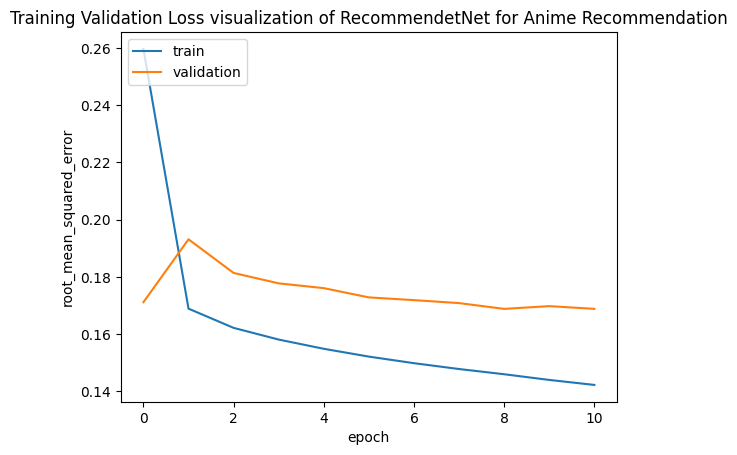

In [122]:
# visualisasi metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Training Validation Loss visualization of RecommendetNet for Anime Recommendation')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Hasil visualisasi training dan validation loss dari model RecommenderNet menunjukkan nilai RMSE yang cenderung menurun seiring epoch. Besar kemungkinan nilai RMSE akan mengalami tren menurun (performa model semakin membaik) jika epoch dibuat semakin besar. Namun, karena alasan keterbatasan perangkat dan daya komputasi, maka epoch maksimum dibatasi sebesar 15. Secara umum performa model RecommenderNet hasil pelatihan cenderung baik

### Hitung RMSE dari data validation

In [138]:
y_pred_train = model.predict(x_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=True)

4688/4688 [==============================] - 13s 3ms/step


In [139]:
print(f'RMSE data train = {rmse_train}')

RMSE data train = 0.03004709241307258


In [136]:
y_pred_val = model.predict(x_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=True)

1563/1563 [==============================] - 4s 2ms/step


In [137]:
print(f'RMSE data validation = {rmse_val}')

RMSE data validation = 0.04034140803685969


Nilai RMSE yang didapatkan dari data validation (25%) menggunakan model RecommenderNet yang telah dilatih adalah 0.04034. Nilai ini cukup kecil dan mendekati 0 (performanya baik). Nilai RMSE yang dihasilkan dari data validation juga memiliki selisih yang tipis dengan RMSE yang dihasilkan pada data training, meskipun ada tanda overfitting namun selisih RMSE keduanya tidak terlampau besar.

### Mendapatkan rekomendasi

#### Siapkan data anime yang indeks anime_id nya sudah diencoding berdasarkan mapping encoding rating

In [123]:
anime_new_df = anime_df_merged.copy()
anime_new_df['encoded_MAL_ID'] = anime_new_df['MAL_ID'].map(anime2anime_encoded)

#### Ambil sampel user secara acak
***
- user yang disampel secara acak dimana jumlah anime berbeda yang ditontonnya >=3

In [124]:
temp_df = df.groupby('user_id')['anime'].count().sort_values(ascending=False).reset_index()
sample_user_id = temp_df[
    temp_df['anime']>=3
].user_id.sample(1).iloc[0]


# siapkan (encoding) data sampel user tersebut
user_encoder = user2user_encoded.get(sample_user_id)

In [125]:
sample_user_id, user_encoder

(52458, 49644)

#### Tentukan anime yang user tersebut pernah tonton dan tidak pernah tonton

In [126]:
# tentukan anime apa saja yang user tersebut pernah tonton dan berikan rating
anime_watched_by_user = df[
    df['user_id']==sample_user_id
]
anime_not_watched_by_user = anime_new_df[
    ~(anime_new_df['MAL_ID'].isin(anime_watched_by_user.anime_id.values))
]['MAL_ID']
anime_not_watched_by_user = list(
    set(anime_not_watched_by_user).intersection(set(anime2anime_encoded.keys()))
)
anime_not_watched_by_user = [
    [anime2anime_encoded.get(x)] for x in anime_not_watched_by_user
]

In [127]:
anime_watched_by_user

,user_id,anime_id,rating,user,anime,scaled_rating
4516020,52458,1698,9,49644,1700,0.888889
4516079,52458,6421,8,49644,1563,0.777778
4515974,52458,270,7,49644,522,0.666667
4516027,52458,2034,10,49644,188,1.000000
4515962,52458,202,10,49644,727,1.000000
4516140,52458,17265,6,49644,60,0.555556
4515966,52458,237,9,49644,1268,0.888889
4515959,52458,170,10,49644,7,1.000000


In [128]:
anime_not_watched_by_user

[[8666],
 [1031],
 [1032],
 [94],
 [2155],
 [3005],
 [8667],
 [8668],
 [8669],
 [8670],
 [8671],
 [8672],
 [95],
 [1582],
 [96],
 [97],
 [845],
 [5],
 [8673],
 [98],
 [5363],
 [99],
 [1499],
 [2156],
 [1762],
 [2280],
 [5721],
 [100],
 [514],
 [515],
 [1483],
 [2743],
 [4770],
 [8678],
 [8679],
 [8680],
 [717],
 [718],
 [101],
 [1583],
 [102],
 [1080],
 [2890],
 [1730],
 [2157],
 [1808],
 [1750],
 [1763],
 [2891],
 [3411],
 [103],
 [1764],
 [516],
 [513],
 [719],
 [1558],
 [104],
 [517],
 [518],
 [846],
 [105],
 [106],
 [1840],
 [6024],
 [1220],
 [1111],
 [1500],
 [1584],
 [2624],
 [1568],
 [2319],
 [8685],
 [1721],
 [1585],
 [1765],
 [2578],
 [4616],
 [2579],
 [2320],
 [1586],
 [2321],
 [2580],
 [2625],
 [1484],
 [2876],
 [2626],
 [1731],
 [1732],
 [2322],
 [1081],
 [1044],
 [1722],
 [1723],
 [2132],
 [1526],
 [2158],
 [1698],
 [720],
 [2675],
 [2121],
 [3475],
 [1766],
 [2309],
 [2627],
 [519],
 [2423],
 [3029],
 [847],
 [2628],
 [2629],
 [4696],
 [4659],
 [2428],
 [721],
 [520],
 [7

#### Siapkan struktur data yang berisi pasangan data user dan anime yang belum pernah ditonton

In [129]:
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched_by_user), anime_not_watched_by_user)
)

#### Lakukan prediksi rekomendasi dengan model pretrained yang sudah dilatih

In [130]:
ratings = model.predict(user_anime_array).flatten()

# dapatkan top rating tertinggi sebanyak 10
top_ratings_indices = ratings.argsort()[-10:][::-1]

# dapatkan id anime yang direkomendasikan oleh model dan belum pernah ditonton user tersebut
recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched_by_user[x][0]) for x in top_ratings_indices
]

308/308 [==============================] - 1s 2ms/step


#### Tampilkan rekomendasi dari hasil prediksi

In [131]:
print('Rekomendasi untuk user-id: {}'.format(sample_user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
top_anime_df_rows = anime_new_df[anime_new_df['MAL_ID'].isin(top_anime_user)]

# tampilkan nama anime dan genresnya dimana user memberikan rating tinggi
for row in top_anime_df_rows.itertuples():
    print(row.Name, ':', row.Genres)

Rekomendasi untuk user-id: 52458
Anime with high ratings from user
--------------------------------
Slam Dunk : Comedy, Drama, School, Shounen, Sports
Wolf's Rain : Action, Adventure, Drama, Fantasy, Mystery, Sci-Fi
Koukyoushihen Eureka Seven : Adventure, Drama, Mecha, Romance, Sci-Fi
Nodame Cantabile : Music, Slice of Life, Comedy, Drama, Romance, Josei
Lovely★Complex : Comedy, Romance, Shoujo


In [132]:
print('----' * 8)
print('Top 10 anime recommendation  from RecommenderNet')
print('----' * 8)
recommended_anime = anime_new_df[anime_new_df['MAL_ID'].isin(recommended_anime_ids)]

# tampilkan rekomendasi anime dari RecommenderNet
for row in recommended_anime.itertuples():
    print(row.Name, ':', row.Genres)

--------------------------------
Top 10 anime recommendation  from RecommenderNet
--------------------------------
Cowboy Bebop : Action, Adventure, Comedy, Drama, Sci-Fi, Space
Naruto : Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
Azumanga Daioh : Slice of Life, Comedy, School
Sen to Chihiro no Kamikakushi : Adventure, Supernatural, Drama
Great Teacher Onizuka : Slice of Life, Comedy, Drama, School, Shounen
Suzumiya Haruhi no Yuuutsu : Comedy, Mystery, Parody, School, Sci-Fi, Slice of Life
Ouran Koukou Host Club : Comedy, Harem, Romance, School, Shoujo
Black Lagoon : Action, Seinen
Death Note : Mystery, Police, Psychological, Supernatural, Thriller, Shounen
Code Geass: Hangyaku no Lelouch : Action, Military, Sci-Fi, Super Power, Drama, Mecha, School


## Penjelasan Kriteria Wajib
***
1. **Membuat dan menjelaskan sistem rekomendasi untuk menyelesaikan permasalahan**

**Jawaban**: <br>
Sistem rekomendasi ini menggunakan dua metode utama:
- Content-Based Filtering: 
    - Menggunakan informasi dari setiap anime, seperti genre, sinopsis, dan rating, untuk merekomendasikan anime yang mirip dengan yang sudah ditonton pengguna.
    - Untuk metode ini, sistem menggunakan Cosine Similarity untuk menghitung kesamaan antara anime berdasarkan fitur-fitur seperti genre dan sinopsis. Ini memungkinkan sistem untuk merekomendasikan anime yang mirip dengan yang telah disukai pengguna sebelumnya.
- Collaborative Filtering: 
    - Memanfaatkan data rating dari pengguna lain untuk merekomendasikan anime yang mungkin disukai pengguna berdasarkan preferensi kolektif.
    - Metode ini memanfaatkan teknik seperti RecommendNet, di mana vektor embedding dari data rating digunakan untuk menemukan pola dalam preferensi pengguna. Dengan cara ini, sistem dapat merekomendasikan anime berdasarkan rating tinggi dari pengguna lain dengan selera serupa. Arsitektur RecommenderNet dirancang untuk merekomendasikan anime baru kepada pengguna berdasarkan pemfilteran kolaboratif menggunakan vektor embedding untuk user_id dan anime_id. 
        - **Lapisan Embedding**
            - Embedding Pengguna: Model memiliki lapisan embedding untuk pengguna yang mengubah ID pengguna menjadi vektor berdimensi tertentu (ukuran embedding). Setiap ID pengguna dipetakan ke vektor unik yang menangkap preferensi pengguna berdasarkan interaksi dengan anime.
            - Embedding Anime: Demikian pula, ada lapisan embedding untuk ID anime yang mengubah setiap ID anime menjadi vektor berdimensi. Vektor ini mewakili karakteristik anime berdasarkan interaksi pengguna.
        - **Struktur Input**
            - Model menerima input dalam bentuk pasangan ID pengguna dan ID anime. Misalnya, jika seorang pengguna telah memberikan rating pada sebuah anime, inputnya akan terstruktur sebagai [user_id, anime_id].
        - **Perhitungan Dot Product**
            - Inti dari proses rekomendasi melibatkan perhitungan dot product antara embedding pengguna dan embedding anime. Dot product ini ***memberikan skor yang menunjukkan seberapa besar kemungkinan pengguna menyukai anime tertentu berdasarkan preferensi yang dipelajari***.
            - Selain itu, bias untuk pengguna dan anime juga ditambahkan ke skor ini untuk mempertimbangkan kecenderungan individu (misalnya, beberapa pengguna mungkin memberikan rating lebih tinggi atau lebih rendah untuk semua item).
        - **Fungsi Aktivasi**
            - Output dari dot product ditambah bias diteruskan melalui fungsi aktivasi sigmoid. Fungsi ini mengubah output ke dalam rentang antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas atau tingkat keyakinan bahwa seorang pengguna akan menyukai anime tertentu.
        - Peran **Root Mean Square Error (RMSE)**
            - Loss function: RMSE digunakan sebagai metrik selama pelatihan untuk mengevaluasi seberapa baik prediksi rating model cocok dengan rating aktual yang diberikan oleh pengguna. Ini menghitung akar kuadrat dari rata-rata selisih kuadrat antara rating yang diprediksi dan rating aktual.
            - Panduan Pelatihan Model: Dengan meminimalkan RMSE selama pelatihan, model belajar untuk menyesuaikan embedding dan bias-nya sedemikian rupa sehingga memberikan prediksi yang lebih akurat. RMSE yang lebih rendah menunjukkan bahwa prediksi model lebih dekat dengan preferensi pengguna yang sebenarnya, yang membantu meningkatkan kualitas rekomendasinya.

- Kesimpulan:
    - Dari implementasi kedua metode ini, diharapkan sistem dapat memberikan rekomendasi anime yang relevan dan bermanfaat bagi pengguna, meningkatkan kepuasan mereka dalam menemukan konten baru.

2. **Menyajikan top-N recommendation sebagai output**

**Jawaban**: <br>
- Hasil top-5 rekomendasi dengan **Content-based filtering** adalah sebagai berikut:
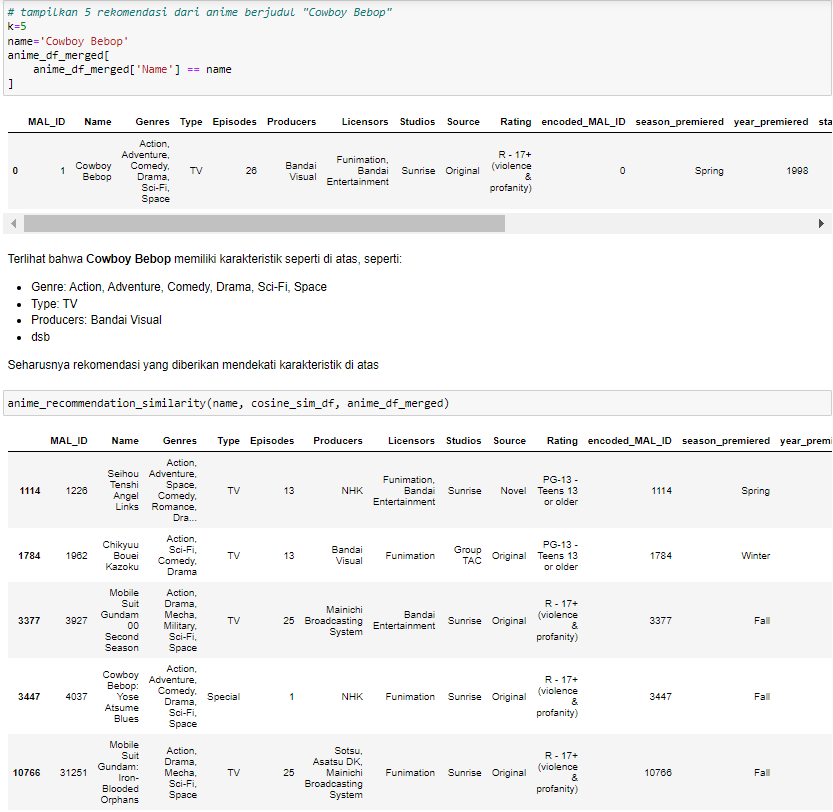
- Hasil top-10 rekomendasi dengan **Collaborative-based filtering** adalah sebagai berikut:
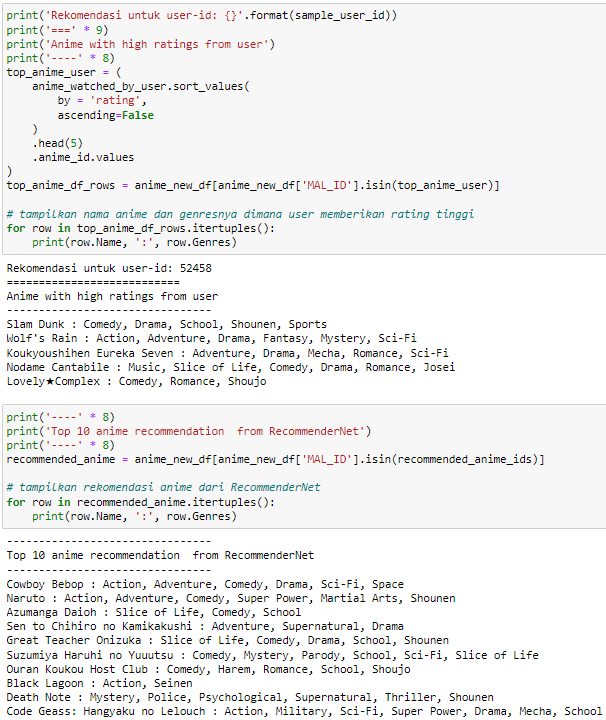

## Penjelasan Kriteria [Optional]
***
1 **Menyajikan dua solusi rekomendasi dengan algoritma yang berbeda**

**Jawaban**: <br>
- Rekomendasi anime yang diberikan pada projek kali ini telah menyajikan dua solusi dengan dua pendekatan, yaitu **Content-based Filtering** dengan menggunakan Cosine Similarity dan **Collaborative-based Filtering** dengan melatih model RecommenderNet dari keras terhadap data rating pengguna
- Hasil top-5 rekomendasi dengan **Content-based filtering** adalah sebagai berikut:
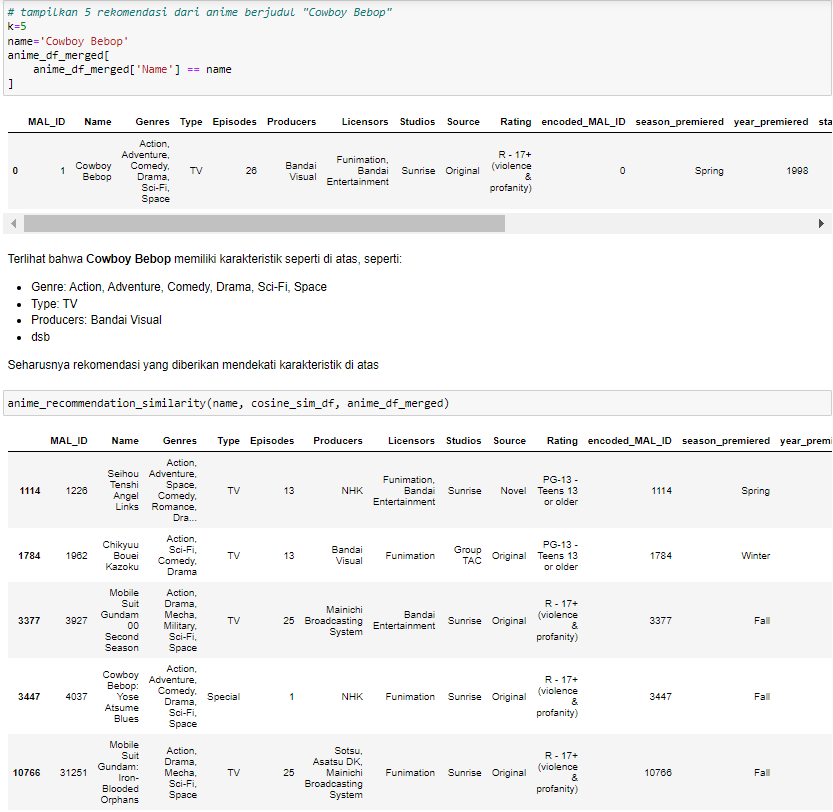
- Hasil top-10 rekomendasi dengan **Collaborative-based filtering** adalah sebagai berikut:
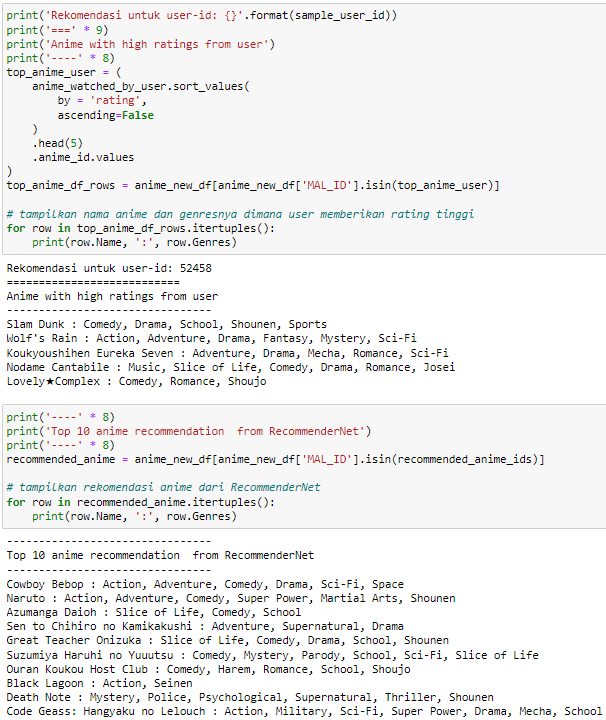
2. **Menjelaskan kelebihan dan kekurangan pada pendekatan yang dipilih**

**Jawaban**: <br>
- **Content-based Filtering**
    - **Kelebihan**
        - Personalisasi: Metode ini menyesuaikan rekomendasi berdasarkan karakteristik spesifik dari anime yang telah disukai pengguna sebelumnya, menghasilkan saran yang sangat relevan.
        - Tidak Memerlukan Data Pengguna: Metode ini tidak bergantung pada data pengguna lain, sehingga efektif untuk pengguna baru atau item di mana sedikit atau tidak ada data interaksi pengguna tersedia (masalah cold start).
        - Keterjelasan: Rekomendasi dapat dijelaskan dengan mudah berdasarkan fitur (seperti genre atau sinopsis) yang mempengaruhi saran, meningkatkan kepercayaan pengguna.
    - **Kekurangan**
        - Keterbatasan Keragaman: Rekomendasi mungkin menjadi terlalu sempit, hanya fokus pada item yang serupa dan gagal memperkenalkan konten yang beragam di luar preferensi yang sudah ditetapkan.
        - Ketergantungan pada Fitur: Efektivitasnya sangat bergantung pada kualitas dan kelengkapan fitur yang digunakan (misalnya, genre, tag). Fitur yang didefinisikan dengan buruk dapat menyebabkan rekomendasi yang suboptimal.
        - Masalah Skalabilitas: Seiring dengan pertumbuhan dataset, perhitungan cosine similarity dapat menjadi mahal secara komputasi, terutama jika tidak dioptimalkan.
- **Collaborative-based Filtering**
    - **Kelebihan**
        - Pemanfaatan Preferensi Pengguna: Metode ini memanfaatkan preferensi kolektif pengguna, yang dapat mengarah pada penemuan anime populer yang mungkin tidak dipertimbangkan oleh pengguna.
        - Keragaman dalam Rekomendasi: Dengan mempertimbangkan rating dari berbagai pengguna, metode ini dapat memperkenalkan lebih banyak variasi konten, berpotensi meningkatkan keterlibatan pengguna.
        - Kemampuan Beradaptasi: Model ini dapat beradaptasi dengan perubahan preferensi pengguna seiring waktu ketika lebih banyak rating dikumpulkan, meningkatkan akurasi rekomendasi.
    - **Kekurangan**
        - Masalah Cold Start: Pengguna atau item baru mungkin kesulitan menerima rekomendasi yang akurat karena kurangnya data historis.
        - Kekurangan Data: Dalam kasus di mana rating pengguna jarang, mungkin sulit untuk menemukan cukup banyak pengguna atau item serupa untuk menghasilkan rekomendasi yang berarti.
        - Kompleksitas dalam Implementasi: Menerapkan model pembelajaran mendalam seperti RecommendNet memerlukan lebih banyak sumber daya komputasi dan keahlian dibandingkan dengan metode yang lebih sederhana seperti content-based filtering.
- **Kesimpulan**

Kedua metode memiliki kelebihan dan tantangan masing-masing. Pendekatan hibrida yang menggabungkan kedua teknik tersebut dapat mengurangi beberapa kelemahan sambil meningkatkan kualitas rekomendasi secara keseluruhan. Misalnya, menggunakan content-based filtering untuk memberikan rekomendasi awal dan kemudian menyempurnakan saran tersebut dengan collaborative filtering dapat menghasilkan sistem yang lebih kuat.

# Evaluation
***
**Kriteria Wajib** <br>
- Menyebutkan metrik evaluasi yang digunakan.
- Menjelaskan hasil proyek berdasarkan metrik evaluasi.

**Kriteria Optional** <br>
- Menjelaskan metrik evaluasi yang digunakan untuk mengukur kinerja model (formula dan cara metrik tersebut bekerja).

## Kriteria Wajib

### Menyebutkan metriks evaluasi yang digunakan

#### Metriks untuk Content-based Filtering

- Metriks yang digunakan untuk Content-based filtering adalah **Cosine Similarity**

#### Metriks untuk Collaborative-based Filtering

- Metriks yang digunakan untuk Collaborative-based filtering adalah **Root Mean Square Error** dari kelas `tf.keras.metrics.RootMeanSquaredError()`
- Saat fase training model RecommenderNet, perhitungan loss didasarkan pada metrik **Mean Squared Error** dari kelas `tf.keras.losses.MeanSquaredError()`

### Menjelaskan hasil proyek berdasarkan metrik evaluasi
***

#### Hasil Rekomendasi Content-based Filtering
***
- Rekomendasi yang diberikan menggunakan cosine similarity untuk Content-based filtering dapat memberikan rekomendasi anime yang serupa dengan baik.
    - Sebagai contoh, anime berjudul `Cowboy Bebop` yang memiliki karakteristik seperti di atas, seperti:
        - Genre: Action, Adventure, Comedy, Drama, Sci-Fi, Space
        - Type: TV
        - Producers: Bandai Visual
        - Licensors: Funimation, Bandai Entertainment
        - Studios: Sunrise
        - Source: Original
        - Rating R-17+
    - mampu diberikan rekomendasi anime yaitu `Seihou Tenshi Angel Links`, `Chikyuu Bouei Kazoku`, `Mobile Suit Gundam 00 Second Season`, `Cowboy Bebop: Yose Atsume Blues`, dan `Mobile Suit Gundam: Iron-Blooded Orphans` yang memiliki karakteristik yang serupa dengan `Cowboy Bebop` mulai dari genre, type, episode, producers, licensors, studios, dan sebagainya.
    - Dari sini juga terlihat kelemahan dari metode Content-based filtering yang tidak mampu memberikan diversifikasi konten anime ke pengguna, sehingga kecenderungan pengguna untuk mendapatkan konten yang berbeda dari apa yang pernah ditontonnya akan semakin kecil. Ini berbeda dengan pendekatan Collaborative-based filtering

#### Hasil Rekomendasi Collaborative-based Filtering dengan RecommenderNet
***
**Hasil Training**
- **Nilai Loss dan RMSE**
    - Loss Pelatihan: Loss pelatihan dimulai dari 0.0678 dan menurun menjadi 0.0220 pada akhir epoch ke-11. Ini menunjukkan bahwa model belajar dengan baik dari data pelatihan.
    - Loss Validasi: Loss validasi dimulai dari 0.0300 dan berfluktuasi sedikit, berakhir pada 0.0303 pada epoch ke-11. Meskipun tetap relatif rendah, tidak ada tren penurunan yang jelas, yang bisa mengindikasikan potensi overfitting atau bahwa model tidak dapat menggeneralisasi dengan baik ke data yang tidak terlihat.
- **Nilai RMSE**
    - RMSE Pelatihan: RMSE akhir untuk set pelatihan adalah sekitar 0.0220, yang menunjukkan bahwa prediksi model cukup dekat dengan rating aktual dalam data pelatihan.
    - RMSE Validasi: RMSE akhir untuk set validasi adalah sekitar 0.0403, yang lebih tinggi dibandingkan RMSE pelatihan. Selisih ini menunjukkan bahwa meskipun model berkinerja baik pada data pelatihan, ia mungkin mengalami kesulitan saat memprediksi rating untuk contoh baru yang tidak terlihat.
- **Inferensi dari hasil**
    - Kemajuan Pembelajaran yang Baik: Penurunan loss pelatihan dan RMSE menunjukkan bahwa model secara efektif belajar dari data pelatihan.
    - Potensi Overfitting: Tidak adanya penurunan signifikan pada loss validasi sementara loss pelatihan terus menurun dapat mengindikasikan overfitting—di mana model belajar noise dalam data pelatihan daripada pola yang dapat digeneralisasi.
    - Generalizabilitas Model: Perbedaan antara RMSE pelatihan dan validasi menunjukkan bahwa meskipun model cocok dengan baik pada data pelatihan, ia mungkin kesulitan dengan contoh baru.

**Hasil Visualisasi** <br>
- Hasil visualisasi training dan validation loss dari model RecommenderNet menunjukkan nilai RMSE yang cenderung menurun seiring epoch. Besar kemungkinan nilai RMSE akan mengalami tren menurun (performa model semakin membaik) jika epoch dibuat semakin besar. Namun, karena alasan keterbatasan perangkat dan daya komputasi, maka epoch maksimum dibatasi sebesar 15. Secara umum performa model RecommenderNet hasil pelatihan cenderung baik

**Nilai RMSE pada data training (x_train) dan (x_val)**
- Nilai RMSE yang didapatkan dari data validation (25%) menggunakan model RecommenderNet yang telah dilatih adalah 0.04034. Nilai ini cukup kecil dan mendekati 0 (performanya baik). Nilai RMSE yang dihasilkan dari data validation juga memiliki selisih yang tipis dengan RMSE yang dihasilkan pada data training, meskipun ada tanda overfitting namun selisih RMSE keduanya tidak terlampau besar.
    - RMSE data train = 0.03004709241307258
    - RMSE data validation = 0.04034140803685969

**Hasil Prediksi / Rekomendasi yang diberikan**
- Model RecommenderNet hasil pelatihan juga mampu memberikan rekomendasi dengan tingkat kesamaan yang baik.
    - Sebagai contoh, user dengan *user_id* = **52458** memiliki top ratings untuk anime bergenre **Comedy, Drama, Action, Adventure, Music, Slice of life, Romance, Shoujo** dan sebagainya. Model RecommenderNet mampu memberikan rekomendasi anime lain dengan genre serupa namun mampu mendiversifikasi pilihan ke pengguna tersebut dengan menawarkan anime dengan genre lainnya seperti **Supernatural, Super Power, Parody, Martial Arts**

## [Optional]

### Menjelaskan metrik evaluasi yang digunakan dengan formula dan cara metriks tersebut bekerja

#### Metriks untuk Content based Filtering: Cosine Similarity
***
- **Cosine Similarity**
    - **Penjelasan**
        - Cosine similarity adalah metrik yang digunakan untuk mengukur kemiripan antara dua vektor dalam ruang berdimensi tinggi dengan menghitung sudut antara mereka. Metrik ini sering digunakan dalam sistem rekomendasi berbasis konten untuk menentukan seberapa mirip dua item (misalnya, anime) berdasarkan fitur-fitur yang ada.
        - Cosine similarity mengukur seberapa dekat dua vektor dalam hal arah, bukan magnitudo. Nilai cosine similarity berkisar antara -1 hingga 1:
            - 1 berarti kedua vektor identik (sama arah).
            - 0 berarti tidak ada kemiripan (sudut 90 derajat).
            - -1 berarti kedua vektor berlawanan arah.
        - Dalam sistem rekomendasi berbasis konten, cosine similarity digunakan untuk menemukan anime yang mirip berdasarkan atribut yang relevan. Misalnya, jika seorang pengguna menyukai Anime A, sistem dapat merekomendasikan Anime B jika cosine similarity antara keduanya tinggi.
    - **Formula**
        - 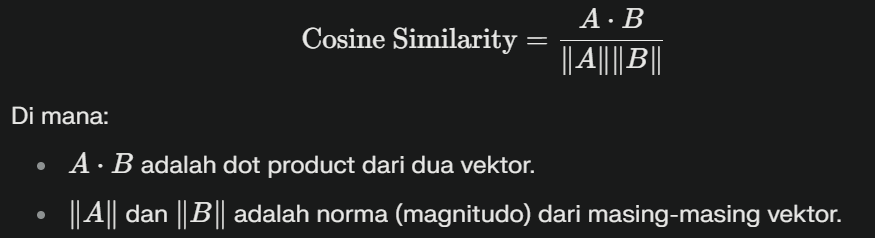
    - **Cara metriks bekerja**
        - Tahapan:
            1. Representasi Vektor: Setiap item (anime) direpresentasikan sebagai vektor fitur. Misalnya, jika kita menggunakan TF-IDF untuk sinopsis, setiap anime akan memiliki vektor berdasarkan kata-kata yang ada.
            2. Menghitung Cosine Similarity: Untuk setiap pasangan anime, hitung cosine similarity menggunakan formula di atas.
            3. Rekomendasi: Setelah menghitung cosine similarity untuk semua pasangan anime, kita dapat merekomendasikan anime yang memiliki nilai similarity tertinggi kepada pengguna berdasarkan anime yang telah mereka tonton atau sukai.
            
    - **Contoh perhitungan**
        - Misalkan kita memiliki dua data anime dengan representasi fitur sebagai berikut:
            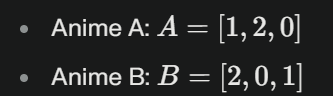
        - Tahapan:
            1. Hitung dot product A.B:
                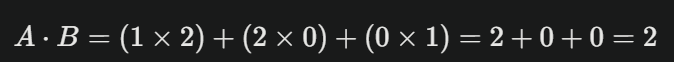
            2. Hitung norma dari masing-masing vektor
                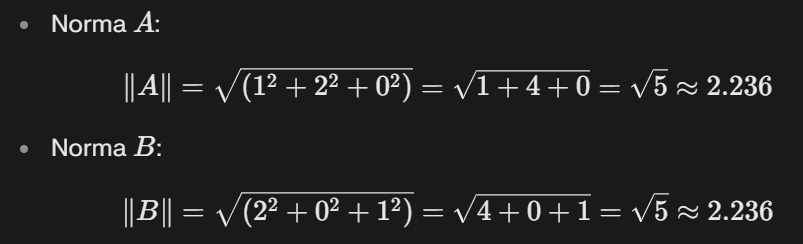
            3. Hitung cosine similarity
                
            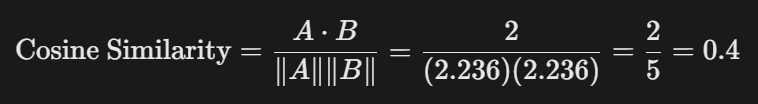

#### Metriks untuk Collaborative based Filtering: Root Mean Square Error, Mean Squared Error, dan Binary Cross Entropy
***
- **Root Mean Square Error**
    - **Penjelasan**
        - Root Mean Square Error (RMSE) adalah metrik yang digunakan untuk mengukur seberapa jauh nilai prediksi dari model berbeda dari nilai aktual yang diobservasi. RMSE memberikan ukuran kesalahan dalam satuan yang sama dengan data asli, sehingga lebih mudah untuk diinterpretasikan.
        - Dalam konteks sistem rekomendasi, RMSE digunakan untuk mengevaluasi seberapa baik model dalam memprediksi rating anime oleh pengguna baru atau yang sudah ada sebelumnya. Semakin rendah nilai RMSE, semakin baik model dalam memprediksi rating yang sesuai dengan preferensi pengguna.
    - **Formula**
        - 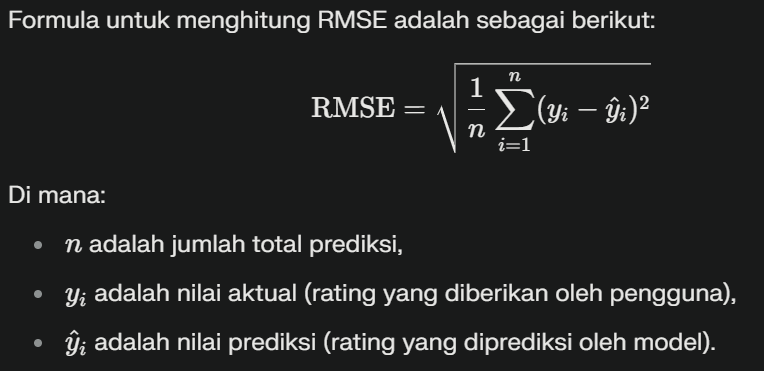
    - **Cara metriks bekerja**
        - RMSE menghitung akar kuadrat dari rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual. Ini memberikan gambaran yang jelas tentang seberapa baik model bekerja dalam memprediksi hasil. RMSE sangat sensitif terhadap outlier, sehingga jika ada kesalahan besar dalam prediksi, RMSE akan meningkat secara signifikan.
        - Tahapan:
            1. Pengumpulan Data: Setelah model dilatih, kita akan memiliki dua set data: nilai aktual dan nilai prediksi.
            2. Menghitung Selisih: Untuk setiap pasangan nilai aktual dan prediksi, hitung selisihnya (y[i] - y_pred[i])
            3. Kuadratkan Selisih: Kuadratkan setiap selisih untuk menghilangkan tanda negatif.
            4. Rata-rata: Hitung rata-rata dari semua selisih kuadrat tersebut.
            5. Akar Kuadrat: Ambil akar kuadrat dari rata-rata tersebut untuk mendapatkan RMSE.
    - **Contoh perhitungan**
        - Misalkan ada data aktual dan hasil prediksi sebagai berikut:
            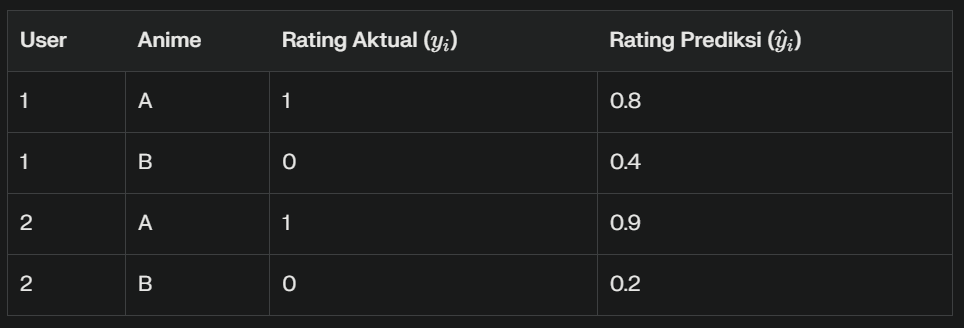
        - RMSE dapat dihitung dengan :
            1. Hitung selisih
                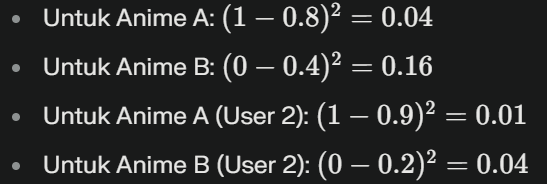
            2. Rata-rata dari semua selisih kuadrat:
                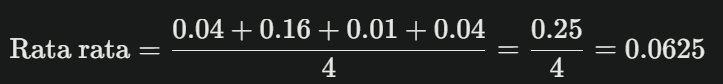
            3. Akar kuadrat dari rata-rata:
                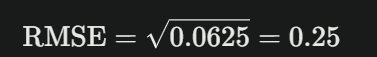
- **Mean Squared Error**
    - **Penjelasan**
        - Mean Squared Error (MSE) adalah fungsi kerugian yang digunakan untuk mengukur seberapa jauh nilai prediksi dari model berbeda dari nilai aktual yang diobservasi. MSE menghitung rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. Dalam konteks sistem rekomendasi, MSE sering digunakan ketika model memprediksi rating kontinu, seperti rating dari 1 hingga 5.
        - MSE memberikan penalti yang lebih besar untuk kesalahan yang lebih besar karena menggunakan kuadrat dari selisih. Ini membuat MSE sangat sensitif terhadap outlier, sehingga jika ada kesalahan besar dalam prediksi, nilai MSE akan meningkat secara signifikan. Ini membantu model belajar untuk menghindari kesalahan besar dalam prediksi.
        - Dalam konteks sistem rekomendasi, MSE digunakan untuk mengevaluasi seberapa baik model dalam memprediksi rating anime oleh pengguna baru atau yang sudah ada sebelumnya. Semakin rendah nilai MSE, semakin baik model dalam memprediksi rating yang sesuai dengan preferensi pengguna.
        - Dengan menggunakan MSE sebagai fungsi kerugian, model berusaha untuk memperbaiki prediksinya dengan meminimalkan nilai kerugian tersebut selama proses pelatihan, sehingga meningkatkan akurasi rekomendasi.
    - **Formula**
        - 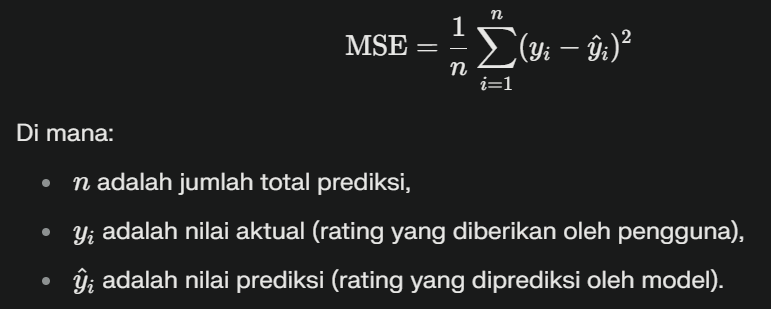
    - **Cara Metriks Bekerja**
        - Tahapan:
            1. Pengumpulan Data: Setelah model dilatih, kita akan memiliki dua set data: nilai aktual dan nilai prediksi.
            2. Menghitung Selisih: Untuk setiap pasangan nilai aktual dan prediksi, hitung selisihnya (y[i] - y_pred[i])
            3. Kuadratkan Selisih: Kuadratkan setiap selisih untuk menghilangkan tanda negatif.
            4. Rata-rata: Hitung rata-rata dari semua selisih kuadrat tersebut untuk mendapatkan MSE.
    - **Contoh perhitungan**
        - Misalkan terdapat data aktual dan hasil prediksi sebagai berikut:
            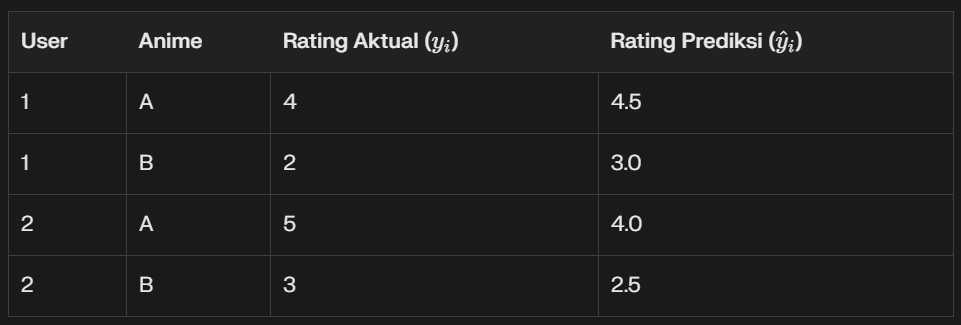
        - MSE dihitung dengan:
            1. Hitung selisih kuadrat untuk setiap pasangan:
                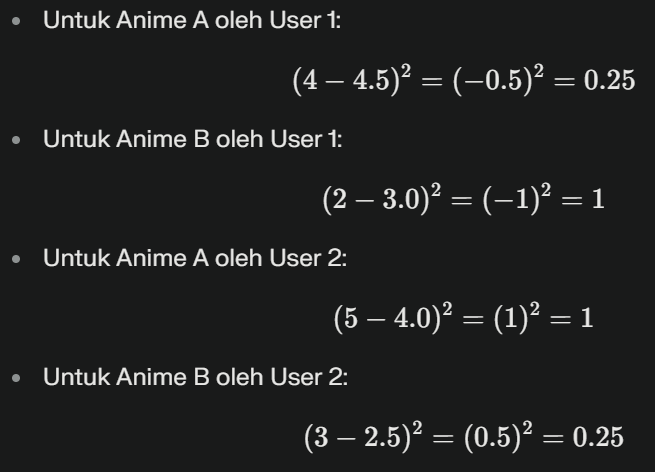
            2. Hitung rata-rata dari semua selisih kuadrat:
                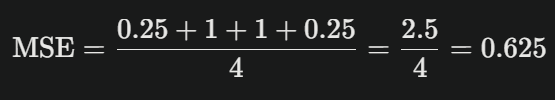
            
- **Binary Cross Entropy**
    - **Penjelasan**
        - Binary Cross-Entropy (BCE) adalah *loss function* yang digunakan dalam pelatihan model, termasuk model rekomendasi seperti RecommenderNet. 
        - Binary Cross-Entropy mengukur seberapa baik model memprediksi rating yang diberikan oleh pengguna terhadap anime. Dalam konteks rekomendasi, kita sering menggunakan rating biner (misalnya, 1 untuk "disukai" dan 0 untuk "tidak disukai"). BCE menghitung selisih antara prediksi model dan nilai aktual, memberikan penalti yang lebih besar untuk kesalahan yang lebih besar.
        - Selama pelatihan, model berusaha untuk meminimalkan nilai BCE. Dengan melakukan ini, model belajar untuk memperbaiki embedding pengguna dan anime serta bias yang ada, sehingga prediksi rating menjadi lebih akurat. Ketika model memberikan prediksi yang lebih baik (lebih mendekati nilai aktual), nilai BCE (loss) akan menurun.
        - BCE sangat cocok untuk masalah klasifikasi biner seperti ini karena memberikan probabilitas output antara 0 dan 1. Ini memungkinkan model untuk memperkirakan seberapa besar kemungkinan seorang pengguna menyukai anime tertentu, yang penting dalam sistem rekomendasi.
        - Semakin kecil nilai BCE selama epoch tertentu maka semakin baik model belajar baik terhadap data training ataupun data validasi
        - BCE fokus pada probabilitas dan penalti untuk kesalahan klasifikasi biner, sedangkan RMSE memberikan ukuran kesalahan absolut dalam skala asli dari data.
        - Dalam konteks sistem rekomendasi, Binary Cross-Entropy digunakan untuk mengevaluasi seberapa baik model dalam memprediksi apakah pengguna menyukai anime tertentu atau tidak berdasarkan data rating biner yang ada.
        - Dengan menggunakan BCE sebagai fungsi kerugian, model berusaha untuk memperbaiki prediksinya dengan meminimalkan nilai kerugian tersebut selama proses pelatihan, sehingga meningkatkan akurasi rekomendasi.
    - **Formula**
        - 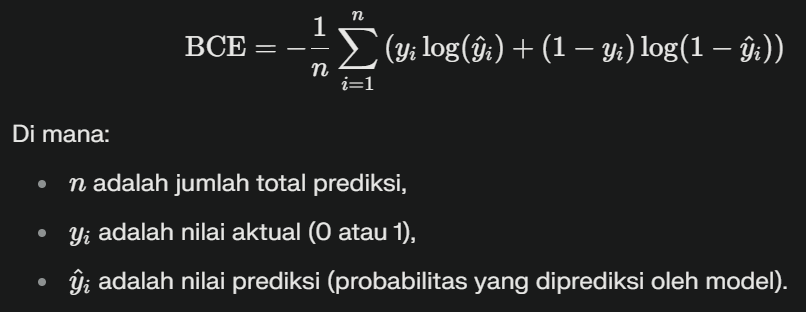
    - **Cara metriks bekerja**
        - BCE menghitung selisih antara nilai aktual dan nilai prediksi dari model. Semakin besar kesalahan prediksi, semakin tinggi nilai BCE. Ini membantu model belajar dari kesalahan dan memperbaiki prediksinya selama proses pelatihan.
        - Tahapan:
            1. Pengumpulan Data: Setelah model dilatih, kita akan memiliki dua set data: nilai aktual dan nilai prediksi.
            2. Menghitung BCE: Untuk setiap pasangan nilai aktual dan prediksi, hitung BCE menggunakan formula di atas.
            3. Minimalkan Kerugian: Selama pelatihan, model berusaha untuk meminimalkan nilai BCE dengan menyesuaikan parameter-parameter internalnya (seperti embedding pengguna dan anime).
    - **Contoh perhitungan**
        - Misalkan ada data aktual dan hasil prediksi sebagai berikut:
            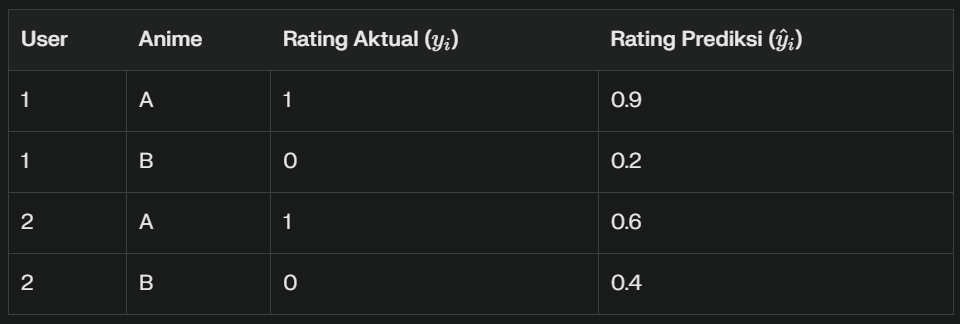
        - BCE dihitung dengan:
            1.Hitung kontribusi untuk setiap pasangan:
                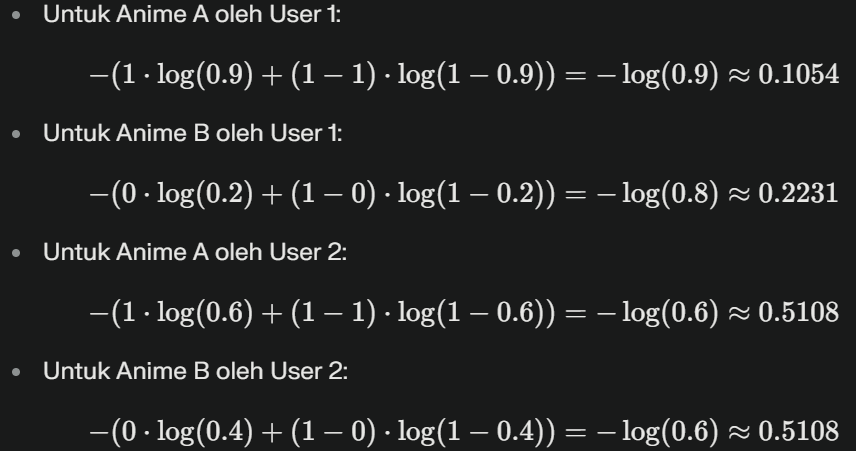
            2. Rata-rata dari semua kontribusi
                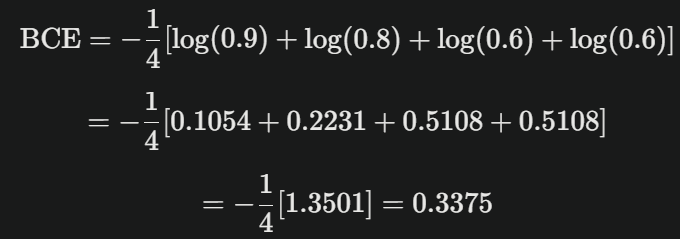
            

            